# Portfolio Simulation

We'll simulate trading a simple risk premia harvesting strategy and the bond window dressing strategy together as a portfolio.

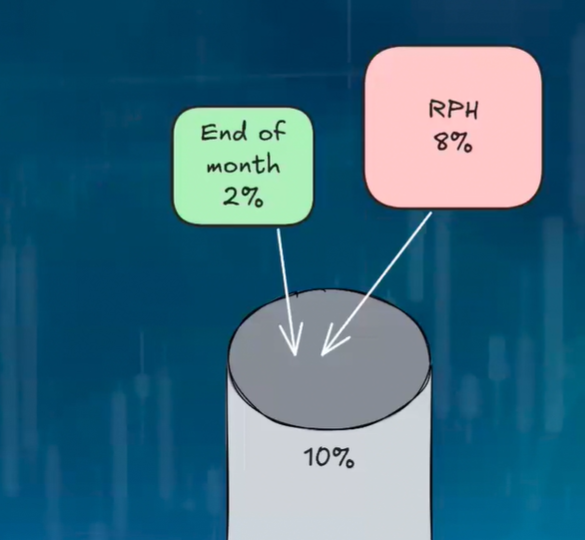

In [ ]:
#install.packages("devtools")
#if(!require(pacman)){install.packages("pacman");require(pacman)}
#devtools::install_github("Robot-Wealth/rsims")

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

Warning message:
"package 'Rtools' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.5/PACKAGES'"


In [ ]:
source("https://raw.githubusercontent.com/RWLab/rwRtools/master/examples/colab/load_libraries.R")
pacman::p_load(quantmod, patchwork, roll)
# Set chart options
options(repr.plot.width = 14, repr.plot.height=7)

Using GitHub PAT from the git credential store.




tidyselect   (NA       -> 1.2.1   ) [CRAN]
generics     (NA       -> 0.1.4   ) [CRAN]
RcppArmad... (15.0.2-2 -> 15.2.2-1) [CRAN]
timechange   (NA       -> 0.3.0   ) [CRAN]
dplyr        (NA       -> 1.1.4   ) [CRAN]
here         (NA       -> 1.0.2   ) [CRAN]
lubridate    (NA       -> 1.9.4   ) [CRAN]
tidyr        (NA       -> 1.3.1   ) [CRAN]


Installing 8 packages: tidyselect, generics, RcppArmadillo, timechange, dplyr, here, lubridate, tidyr

Installing packages into 'C:/Users/User/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
                binary   source needs_compilation
RcppArmadillo 15.0.2-2 15.2.2-1              TRUE

package 'tidyselect' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'timechange' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'here' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpkNt2zt\downloaded_packages


installing the source package 'RcppArmadillo'




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\User\AppData\Local\Temp\RtmpkNt2zt\remotes7c086fb8131a\Robot-Wealth-rsims-2c58071/DESCRIPTION' ... OK
* preparing 'rsims':
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building 'rsims_1.2.4.tar.gz'



Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



In [2]:
# Check if packages are installed, and install them if they are not
if (!requireNamespace("PerformanceAnalytics", quietly = TRUE)) install.packages("PerformanceAnalytics")
if (!requireNamespace("tidyverse", quietly = TRUE)) install.packages("tidyverse")
if (!requireNamespace("knitr", quietly = TRUE)) install.packages("knitr")
if (!requireNamespace("scales", quietly = TRUE)) install.packages("scales")

# Load the required packages
library(tidyverse)
library(knitr)
library(scales)
library(PerformanceAnalytics)

# Use the 'source' function to load the script directly from the URL.
# This executes the script, defining all the functions (like apply_adaptive_trading_buffer)
# into your current R environment.
source('https://raw.githubusercontent.com/DBremen/R-quant/refs/heads/main/quant_functions.r')

# Verification
print("Functions loaded successfully from GitHub. Available functions:")
ls(pattern='mq_')

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependency 'quadprog'




package 'quadprog' successfully unpacked and MD5 sums checked
package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpkNt2zt\downloaded_packages


Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'bit', 'rematch', 'bit64', 'blob', 'DBI', 'data.table', 'gargle', 'cellranger', 'ids', 'rematch2', 'vroom', 'tzdb', 'progress', 'selectr', 'broom', 'conflicted', 'dbplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'hms', 'httr', 'modelr', 'readr', 'readxl', 'reprex', 'rvest'





  There is a binary version available but the source version is later:
        binary source needs_compilation
selectr  0.4-2  0.5-0             FALSE

package 'bit' successfully unpacked and MD5 sums checked
package 'rematch' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'gargle' successfully unpacked and MD5 sums checked
package 'cellranger' successfully unpacked and MD5 sums checked
package 'ids' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'vroom' successfully unpacked and MD5 sums checked
package 'tzdb' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'c

installing the source package 'selectr'


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks xts::last()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend




[1] "Functions loaded successfully from GitHub. Available functions:"


[1] "mq_add_vol_targeting_weights"            
 [2] "mq_add_volatility"                       
 [3] "mq_apply_adaptive_trading_buffer"        
 [4] "mq_apply_trading_buffer_weight"          
 [5] "mq_backtest_annual_performance"          
 [6] "mq_backtest_cashexposure_leverage"       
 [7] "mq_backtest_percentage_exposure"         
 [8] "mq_backtest_plot_NAV_ticker_exposure"    
 [9] "mq_backtest_rolling_portfolioPerformance"
[10] "mq_backtest_rolling_portfolioVol"        
[11] "mq_backtest_summarystats"                
[12] "mq_backtest_ticker_stats"                
[13] "mq_backtest_tradelog"                    
[14] "mq_backtest_tradeSummary"                
[15] "mq_find_first_full_date"                 
[16] "mq_get_backtest_sharpe"                  
[17] "mq_get_csv_Yahoo"                        
[18] "mq_get_na_rows"                          
[19] "mq_get_return_by_tdm"                    
[20] "mq_get_stock_bond_outperformance"        
[21] "mq_get_tbill_rate_matrix"                
[22] "mq_plot_return_vol"                      
[23] "mq_plot_ticker_attribute"                
[24] "mq_update_price"                         
[25] "mq_xts_to_tidy"

In [3]:
#EU SPF1.DE = bond /VAGT.DE/TRXL.DE/SXRC.MU/PRAS.DE
#SXR8.DE = s&P/ VNRA.DE / EUNL.DE
#GLD.DE / IGLD.DE / EWG2.SG /8PSG.DE
getSymbols(c('PRAS.DE','SXR8.DE','EWG2.SG'))
#prices <- xts_to_tidy(SPF1.DE, SXR8.DE) %>%
prices <- mq_xts_to_tidy(SXR8.DE, PRAS.DE, EWG2.SG) %>%
  arrange(date, ticker)


Warning message:
"SXR8.DE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."


[1] "PRAS.DE" "SXR8.DE" "EWG2.SG"

In [4]:
mq_find_first_full_date(prices)

[1] "2020-01-22"

In [5]:
prices <- prices %>%
  filter(date>'2020-02-01')

In [248]:
prices %>%
  # Group the data by the 'ticker' column
  dplyr::group_by(ticker) %>%
  dplyr::summarise(
    count_non_na = sum(!is.na(close))
  )

ticker  count_non_na
1 EWG2.SG 1482        
2 PRAS.DE 1482        
3 SXR8.DE 1481

In [6]:
mq_get_na_rows(prices)

date       ticker  close  adjusted
1 2025-10-23 SXR8.DE 619.62 619.62  
2 2025-10-24 SXR8.DE     NA     NA  
3 2025-10-27 SXR8.DE 630.26 630.26

In [7]:
results <- mq_update_price(prices, "SXR8.DE", "2025-10-24", 625.68)
# Assign the updated data frame back to 'prices'
prices <- results$df_updated
# View the confirmation
results$rows_confirmed

date       ticker  close  adjusted
1 2025-10-24 SXR8.DE 625.68 625.68

Make sure our prices looks sensible.

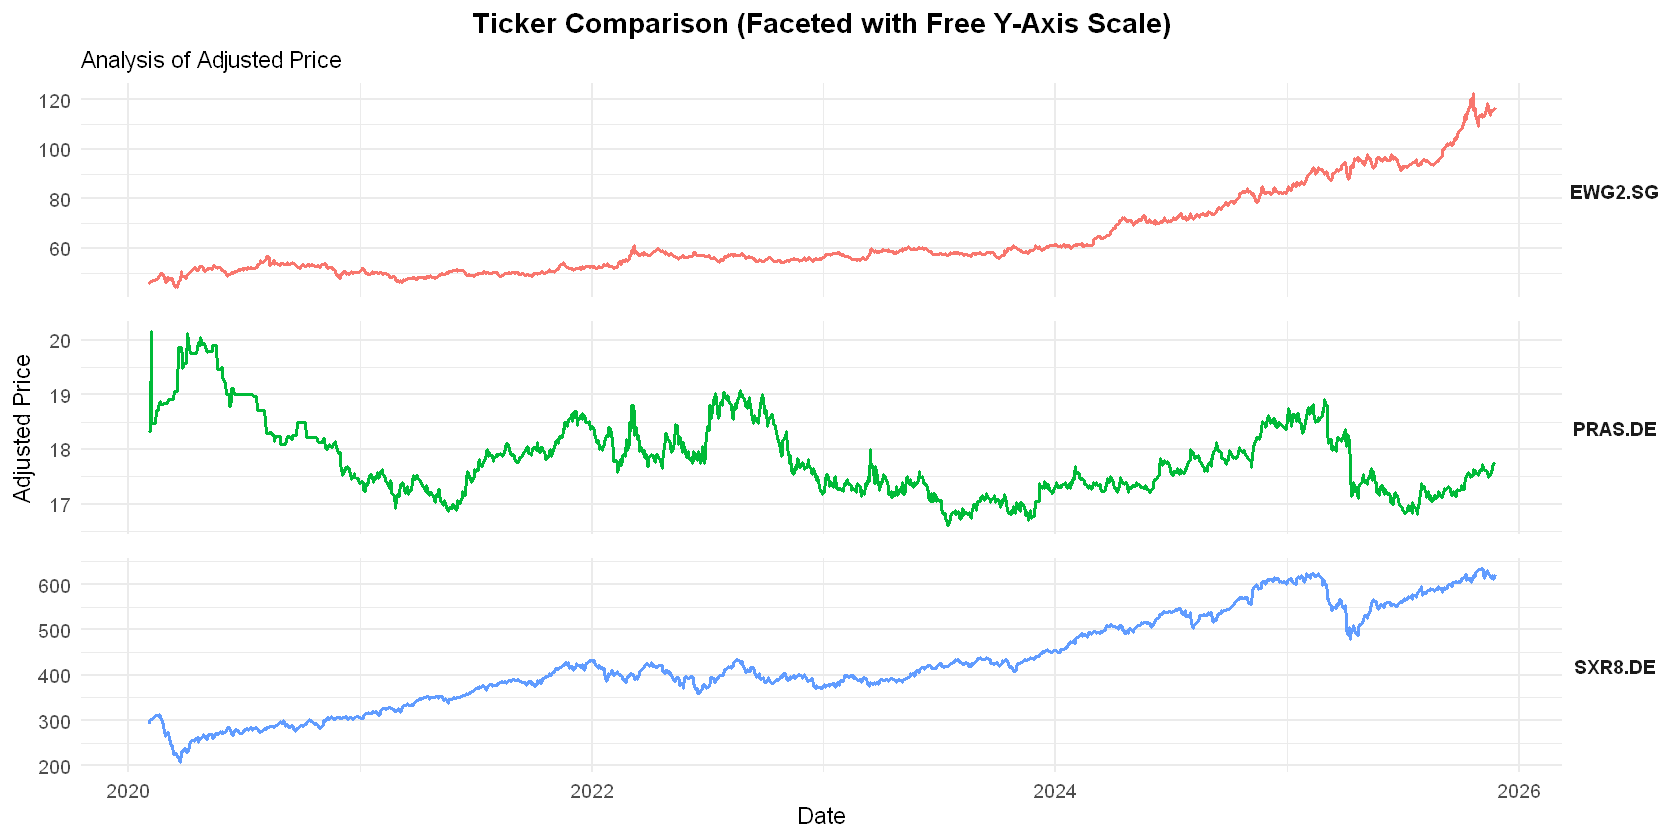

In [10]:
mq_plot_ticker_attribute(prices)

In [9]:
results <- mq_update_price(prices, "PRAS.DE", "2025-10-24", 17.57)
# Assign the updated data frame back to 'prices'
prices <- results$df_updated
# View the confirmation
results$rows_confirmed

date       ticker  close adjusted
1 2025-10-24 PRAS.DE 17.57 17.57

## Define RP target vol targets

We want RP to contribute 8% to our portfolio vol. We'll split that equally between the three assets.

We'll target the following annualised vols in our RP strategy:
- VTI: 2.67%
- TLT: 2.67%
- GLD: 2.67%

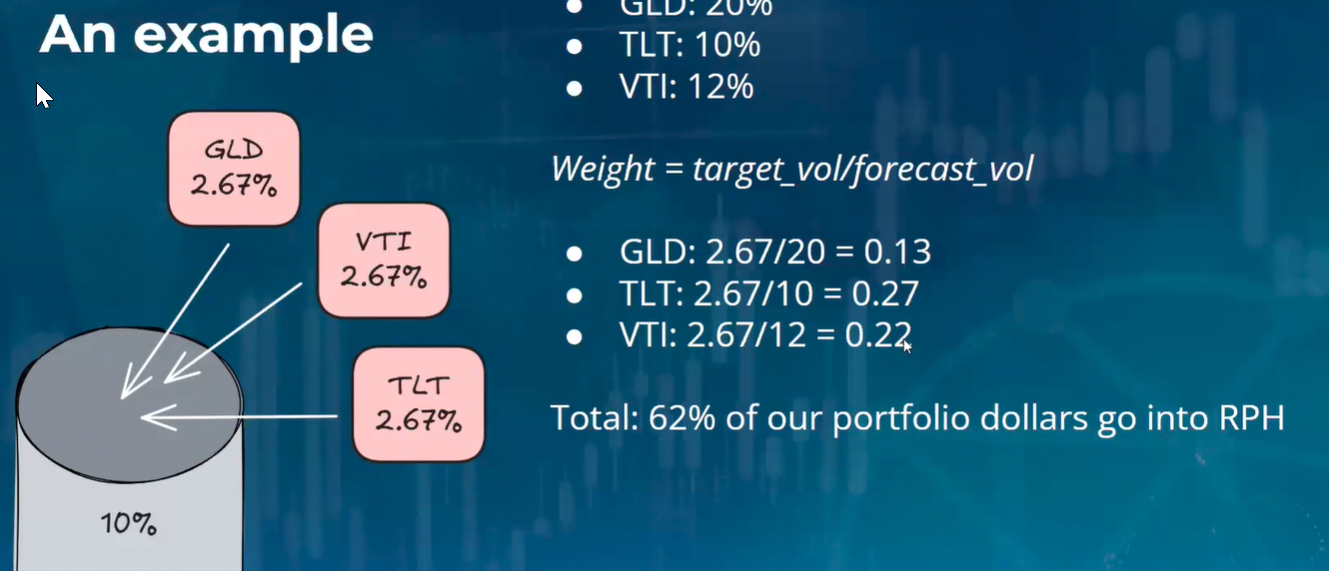

In [254]:
sim_df <- mq_add_volatility(prices)

tail(sim_df)

date       ticker  close    adjusted log_return   volatility lag_volatility
1 2025-11-20 EWG2.SG 115.5000 115.5000 -0.002680366 0.24175009 0.24190378    
2 2025-11-20 PRAS.DE  17.6705  17.6705  0.001784215 0.04559654 0.04569202    
3 2025-11-20 SXR8.DE 619.9600 619.9600  0.008423032 0.12572297 0.12510050    
4 2025-11-21 EWG2.SG 115.8200 115.8200  0.002766729 0.24175080 0.24175009    
5 2025-11-21 PRAS.DE  17.7400  17.7400  0.003925393 0.04519601 0.04559654    
6 2025-11-21 SXR8.DE 612.0800 612.0800 -0.012791974 0.12775206 0.12572297

Warning message:
“Removed 177 rows containing missing values or values outside the scale range
(`geom_line()`).”


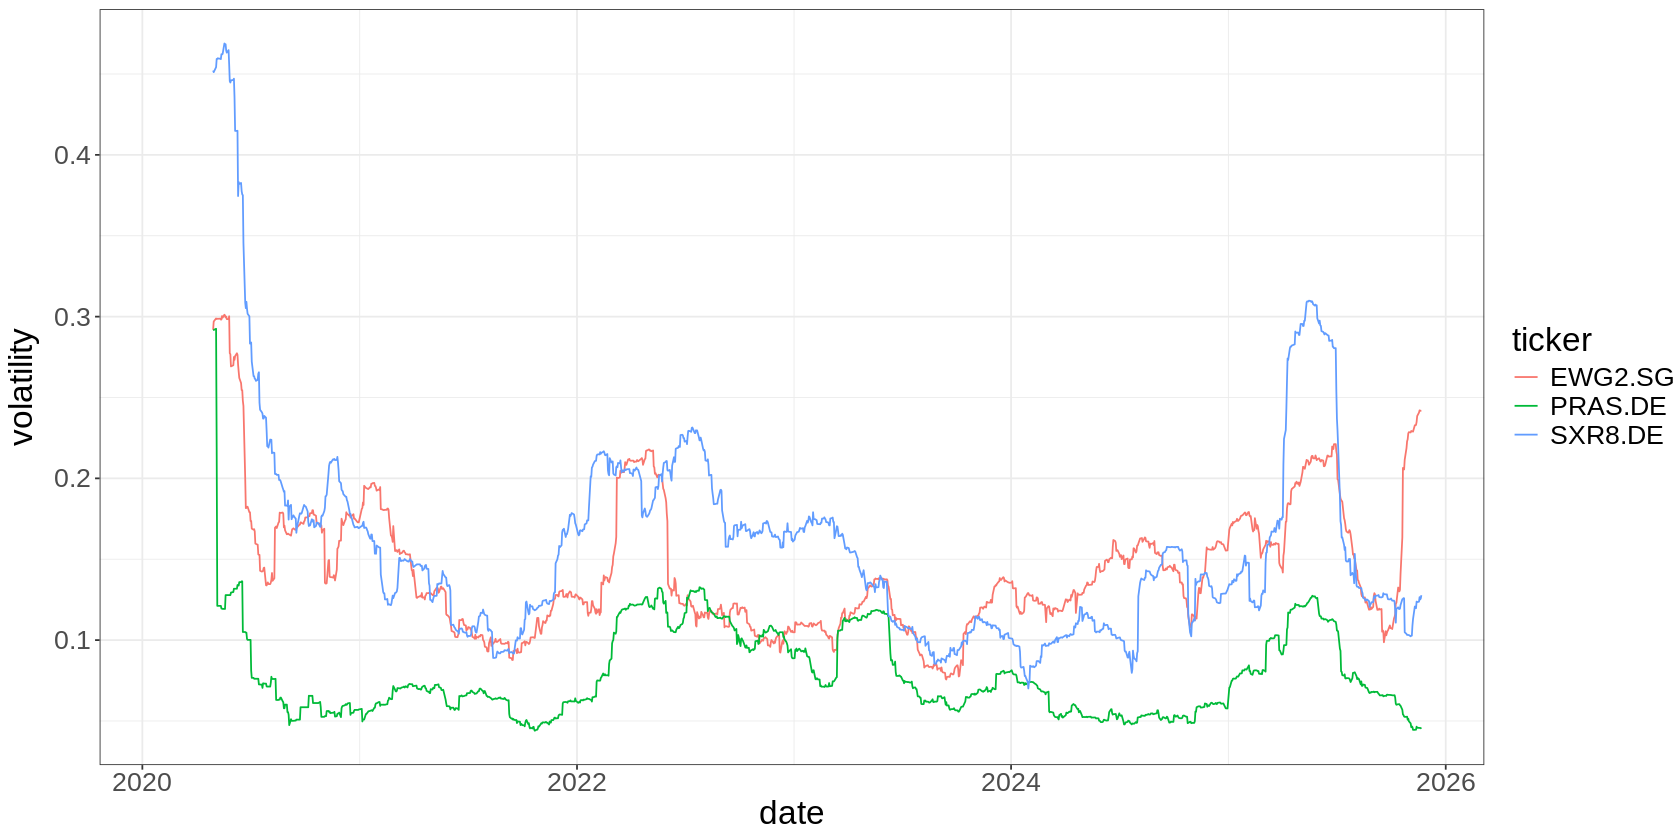

In [255]:
sim_df %>%
  ggplot(aes(x = date, y = volatility, colour = ticker)) +
    geom_line()

Portfolio weight (proprotion of portfolio value) is `w = target_vol/forecast_vol`.  

Then, the dollar allocation is `dollars = w*portfolio_value`

And the number of shares to buy is `dollars/price` - rounded down to the nearest whole number.

In [256]:
library('scales')
#'SXRC.MU','SXR8.DE','EWG2.SG'))
target_vol_ticker <- c(SXR8.DE = 0.05, PRAS.DE = 0.02, EWG2.SG = 0.03)
percent(sum(target_vol_ticker))
rp_weights_df <- mq_add_vol_targeting_weights(sim_df, target_vol_ticker)
tail(rp_weights_df)

[1] "10%"

date       ticker  close    adjusted log_return   volatility lag_volatility
1 2025-11-20 EWG2.SG 115.5000 115.5000 -0.002680366 0.24175009 0.24190378    
2 2025-11-20 PRAS.DE  17.6705  17.6705  0.001784215 0.04559654 0.04569202    
3 2025-11-20 SXR8.DE 619.9600 619.9600  0.008423032 0.12572297 0.12510050    
4 2025-11-21 EWG2.SG 115.8200 115.8200  0.002766729 0.24175080 0.24175009    
5 2025-11-21 PRAS.DE  17.7400  17.7400  0.003925393 0.04519601 0.04559654    
6 2025-11-21 SXR8.DE 612.0800 612.0800 -0.012791974 0.12775206 0.12572297    
  weight_rp
1 0.1240163
2 0.4377132
3 0.3996787
4 0.1240951
5 0.4386297
6 0.3976998

Warning message:
“Removed 357 rows containing missing values or values outside the scale range
(`geom_line()`).”


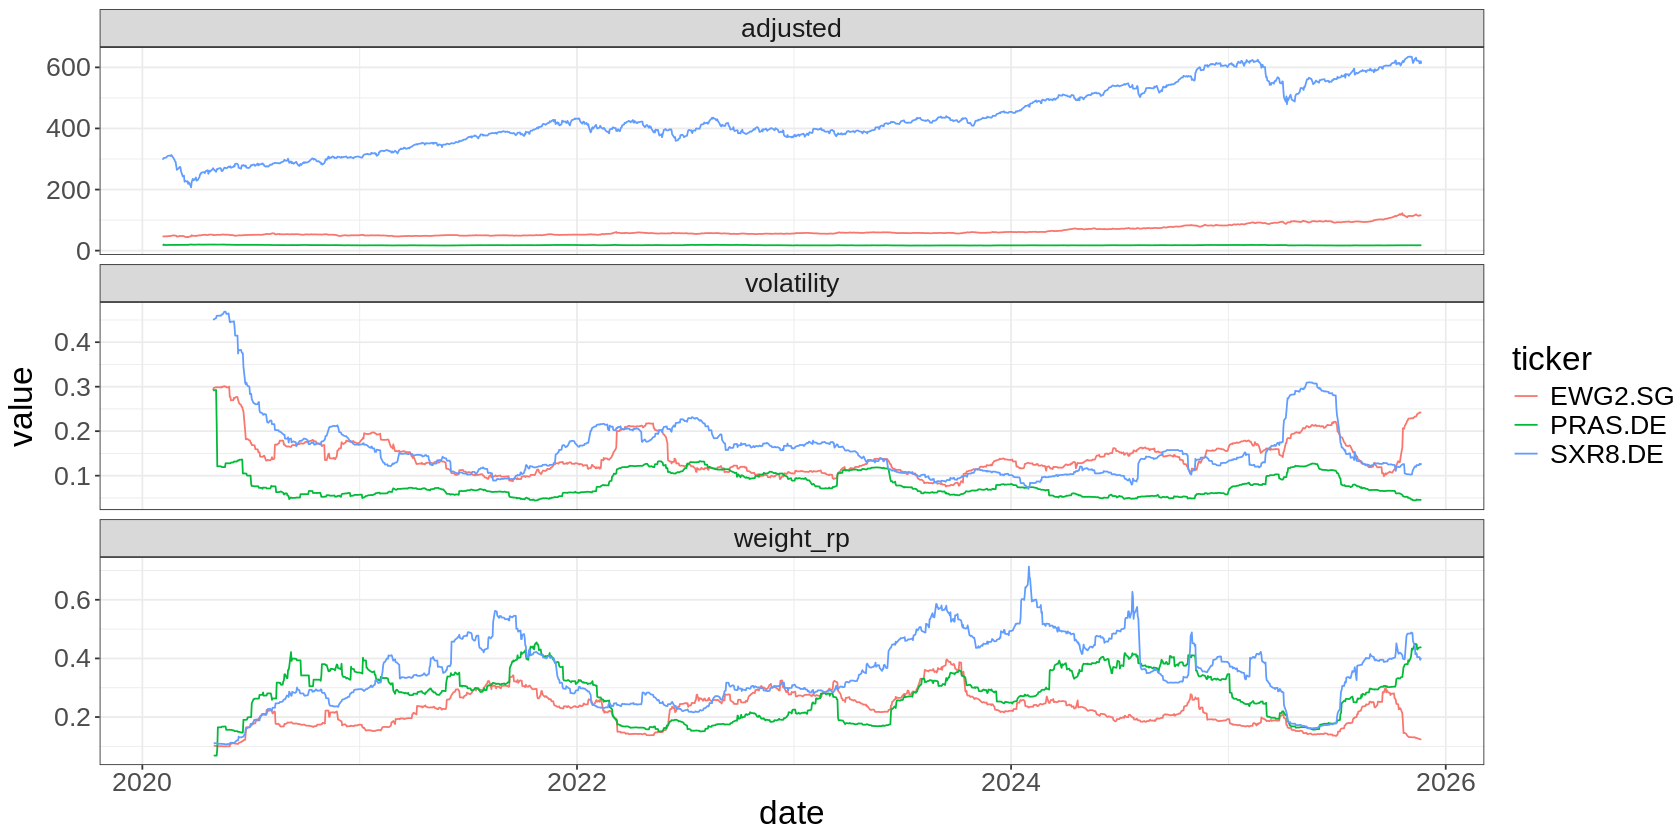

In [257]:
rp_weights_df %>%
  pivot_longer(c(adjusted, volatility, weight_rp), names_to = "metric", values_to = "value") %>%
  ggplot(aes(x = date, y = value, colour = ticker)) +
  geom_line() +
  facet_wrap(~metric, ncol = 1, scales = "free_y")

Warning message:
“Removed 60 rows containing missing values or values outside the scale range
(`geom_line()`).”


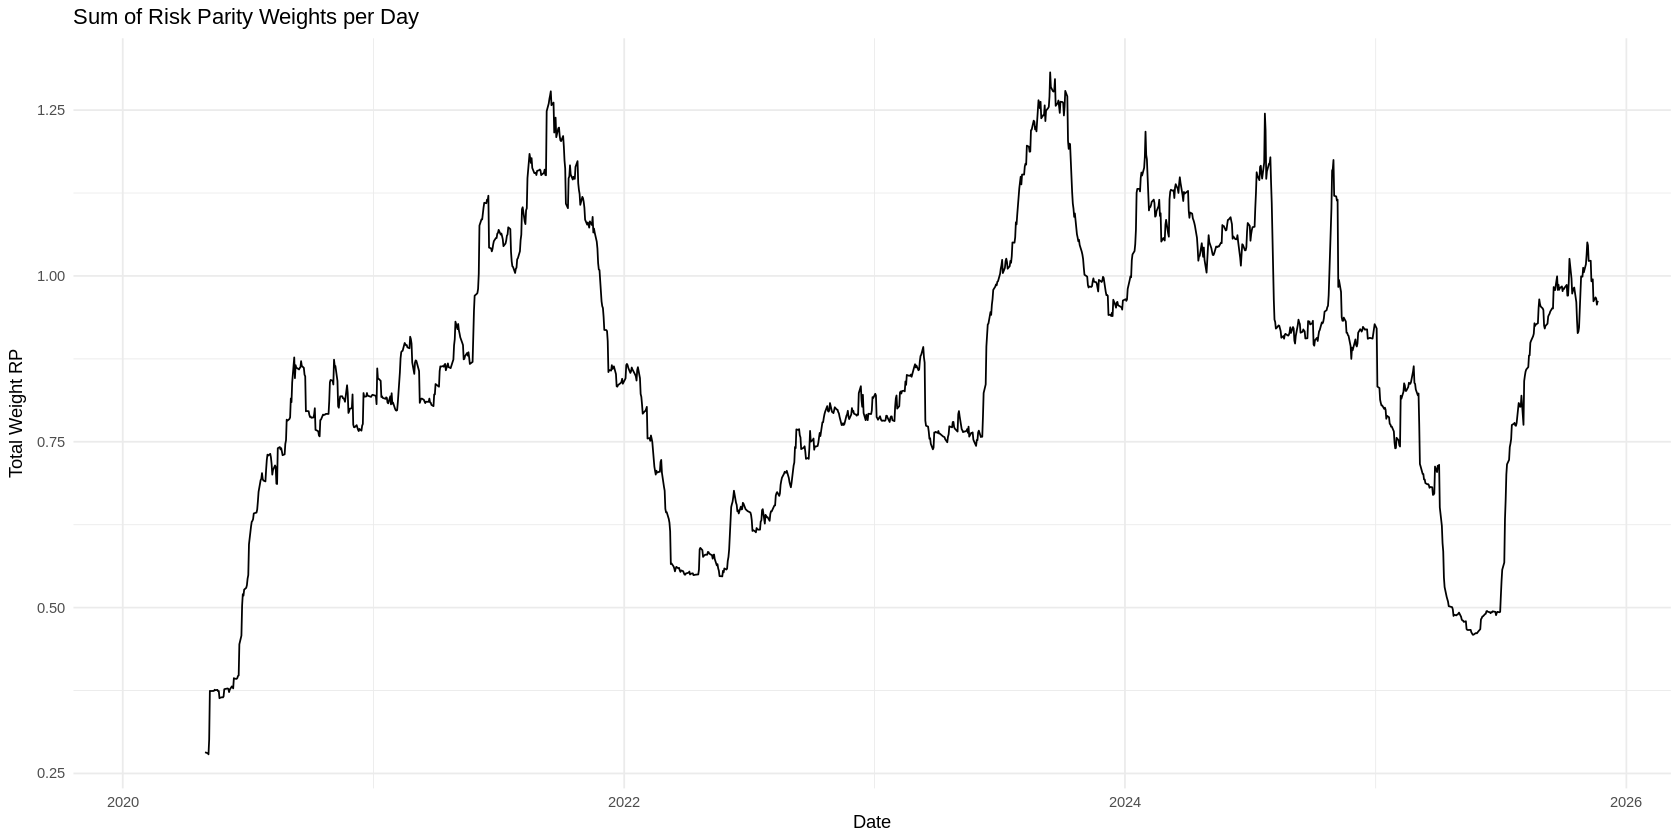

In [258]:
daily_weight_rp_sum <- rp_weights_df %>%
  group_by(date) %>%
  summarise(total_weight_rp = sum(weight_rp)) %>%
  ungroup()


daily_weight_rp_sum %>%
  ggplot(aes(x = date, y = total_weight_rp)) +
  geom_line() +
  labs(title = "Sum of Risk Parity Weights per Day",
       x = "Date",
       y = "Total Weight RP") +
  theme_minimal()


## Define rebalance strategy (TLT vs VTI) weights


---


Wealth management funds systematically rebalancing between stocks and bonds, tend to buy the outperformer and sell the underperformer. Given how similar their exposures are, and their size, these flows will be massive
Around the 15th trading day of the month (roughly day 20-22 on the calendar), check which asset outperformed since the start of the month.
•	If SPY outperformed TLT → Buy TLT or ZB
•	If TLT outperformed SPY → Buy SPY or ES
Hold until month-end. Close the position. Repeat next month.


---

This requires a little more data wrangling...

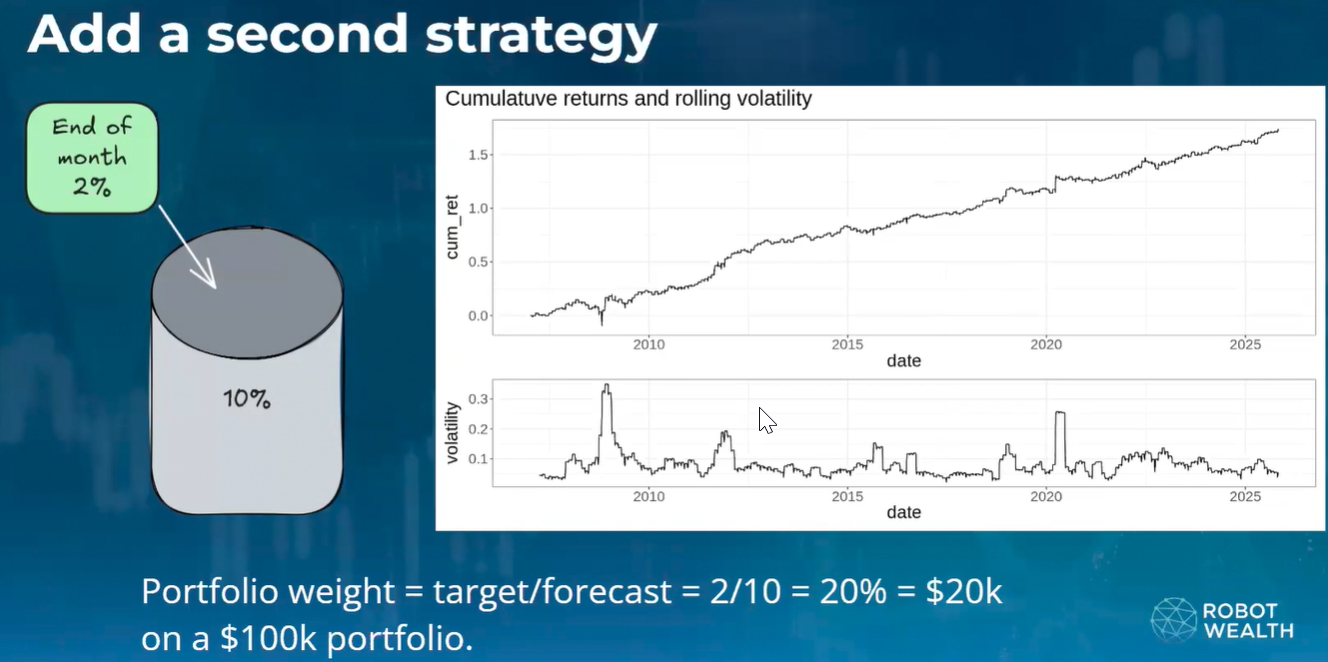

In [259]:
flow_prices <- mq_get_return_by_tdm(prices,stock_ticker='SXR8.DE', bond_ticker='PRAS.DE')

In [260]:
cutoff_tdm = 14
flow_df <- mq_get_stock_bond_outperformance(flow_prices, cutoff_tdm , stock_ticker = 'SXR8.DE', bond_ticker = 'PRAS.DE')

In [261]:
# join outperformance data and get positions

flow_positions <- flow_prices %>%
  mutate(month = month(date), year = year(date)) %>%
  group_by(ticker, month, year) %>%
  left_join(flow_df, by = c("year", "month")) %>%
  mutate(position = case_when(
    #buy VTI when TLT outperformed otherwise TLT from day 15 until month-end
    tdm > cutoff_tdm+1 & ticker == "SXR8.DE" & equity_outperformance < 0 ~ 1,
    tdm > cutoff_tdm+1 & ticker == "PRAS.DE" & equity_outperformance > 0 ~ 1,
    TRUE ~ 0
  ))




Warning message:
“Removed 59 rows containing missing values or values outside the scale range
(`geom_line()`).”


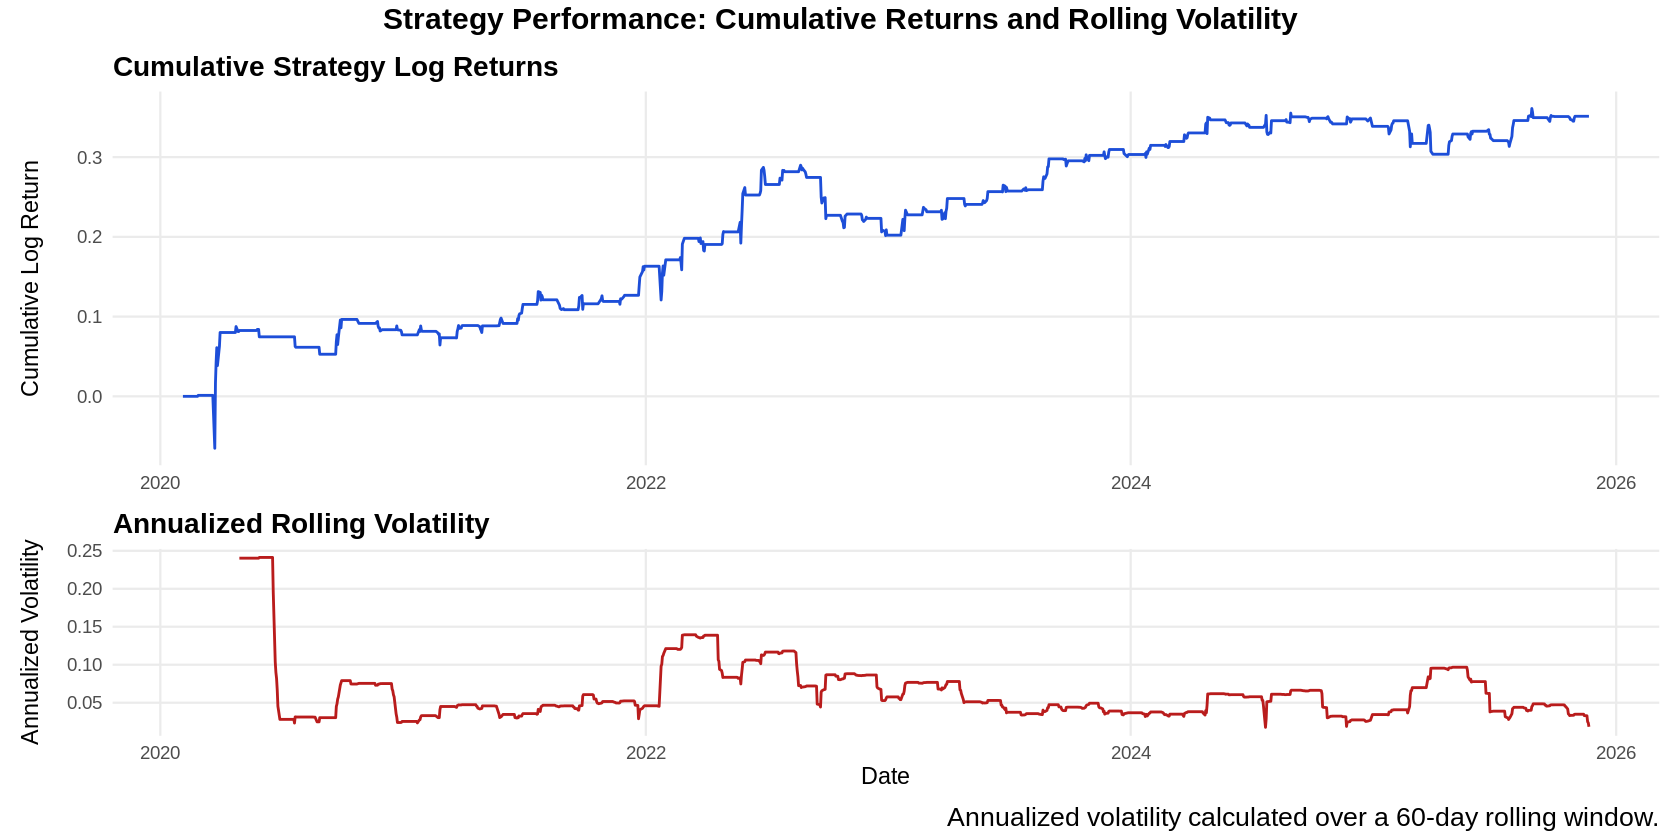

In [262]:
mq_plot_return_vol(flow_positions)

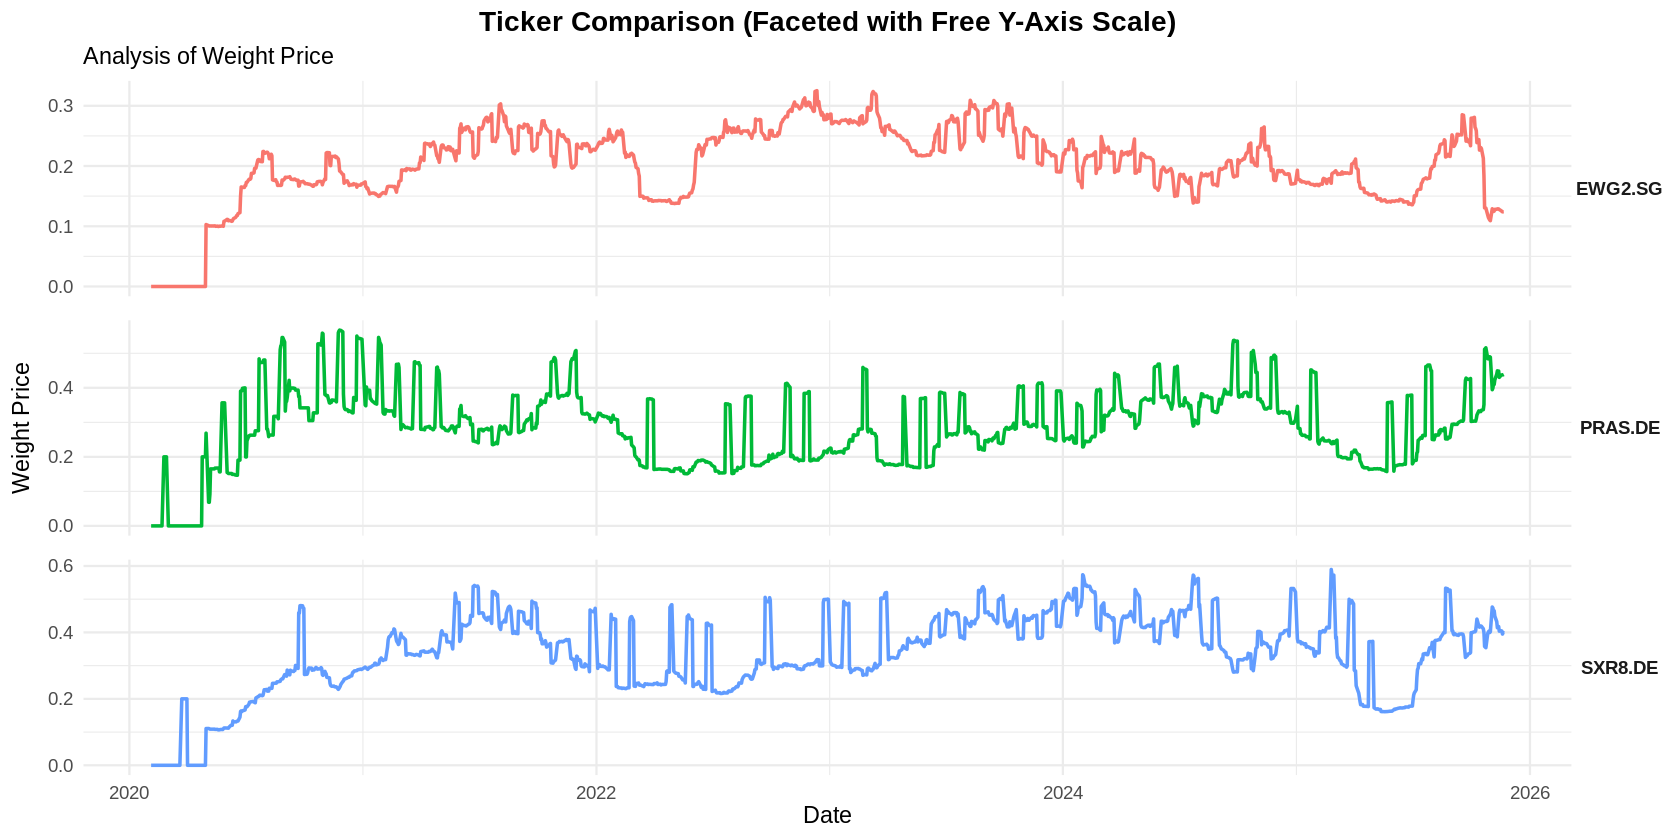

In [263]:
# apply 20% scaling to flow rebalancing positions
port_df <- flow_positions %>%
  ungroup() %>%
  mutate(scaled_flow_weight = 2/10*position) %>%
  select(date, ticker, scaled_flow_weight) %>%
  full_join(rp_weights_df, by = c("ticker", "date")) %>%
  replace_na(list(weight_rp = 0, scaled_flow_weight = 0)) %>%
  #add the scaled (20%) weights of the rebalance strategy to the risk premia harvesting strategy
  mutate(weight = scaled_flow_weight + weight_rp) %>%
  #scale down proportionally if sum of weights > 1
  group_by(date) %>%
  mutate(
    total_abs_weight = sum(abs(weight)),
    weight = ifelse(total_abs_weight > 1, weight / total_abs_weight, weight)
  ) %>%
  ungroup()

mq_plot_ticker_attribute(port_df, y_col = "weight")


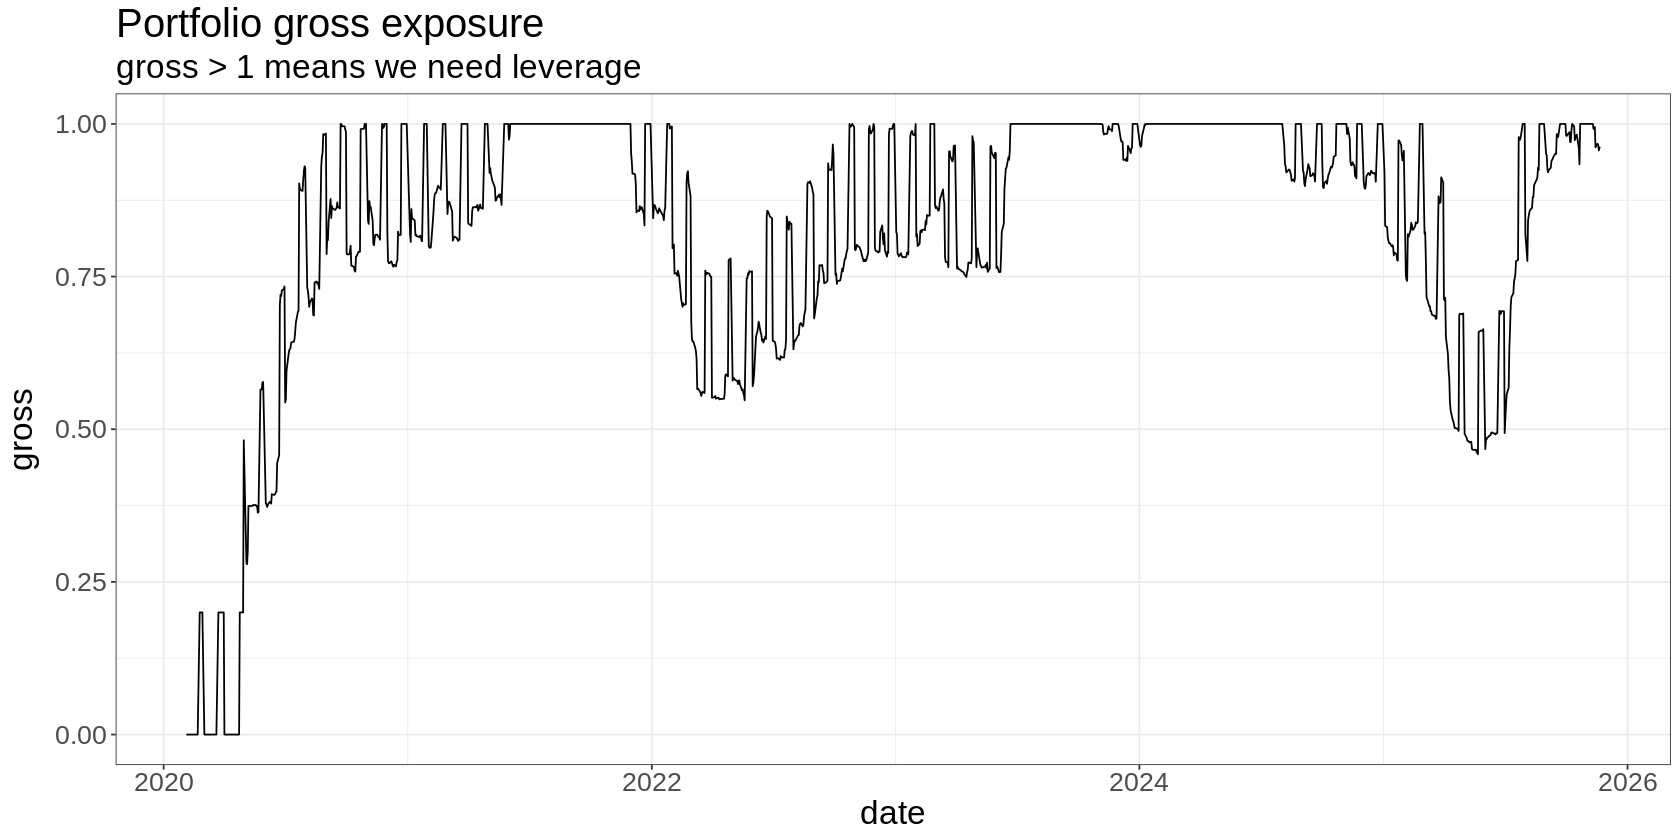

In [264]:
port_df %>%
  group_by(date) %>%
  summarise(gross = sum(abs(weight))) %>%
  ggplot(aes(x = date, y = gross)) + geom_line() + labs(title = "Portfolio gross exposure", subtitle = "gross > 1 means we need leverage")

# Scaled version with trade buffer

## Trade buffer based on percentage of weight

##Trade buffer based on sigma of asset's volatility

> Why an Adaptive Buffer Still Works with VT Weights.The key is that the fixed-weight buffer ignores the daily noise of the asset, which is exactly what a volatility buffer captures:
- VT Sets the Target Size,
- Volatility Buffer Sets the Friction:VT:

 If Asset A is 2x more volatile than Asset B, VT assigns a weight to B that is 2x larger than A. (E.g., B=10%, A=5%).

 Fixed Buffer: A 5% buffer on the weight is arbitrary. A 5% drift from the $10\%$ target (Asset B) might be smaller than the asset's typical daily movement (noise), but a 5% drift from the $5\%$ target (Asset A) might be a huge percentage move that should be executed.

 Volatility Buffer: By setting the buffer relative to the asset's short-term realized volatility ($\sigma$), you ensure you only trade when the target shift is significantly larger than the asset's typical daily variation.Adapting to Volatility Regimes:If an asset suddenly enters a low-volatility period, its $\sigma$ drops, and the buffer automatically narrows. This ensures the strategy executes trades quickly, as small weight changes are now statistically significant signals.If an asset enters a high-volatility period, its $\sigma$ increases, and the buffer automatically widens. This prevents noise-driven, high-cost trades.In summary, the Volatility Targeting calculation solves how much to hold; the Volatility Buffer solves when to rebalance that holding. They are complementary.



In [265]:
trade_buffer <- .3
port_df <- mq_apply_trading_buffer_weight(port_df, trade_buffer)
#weight = weight_buffer_weight

In [266]:
VOL_MULTIPLIER <- 2.2

# 3. Apply the adaptive buffer logic
port_df <- mq_apply_adaptive_trading_buffer(port_df, VOL_MULTIPLIER)
#weight = weight_buffer_vol

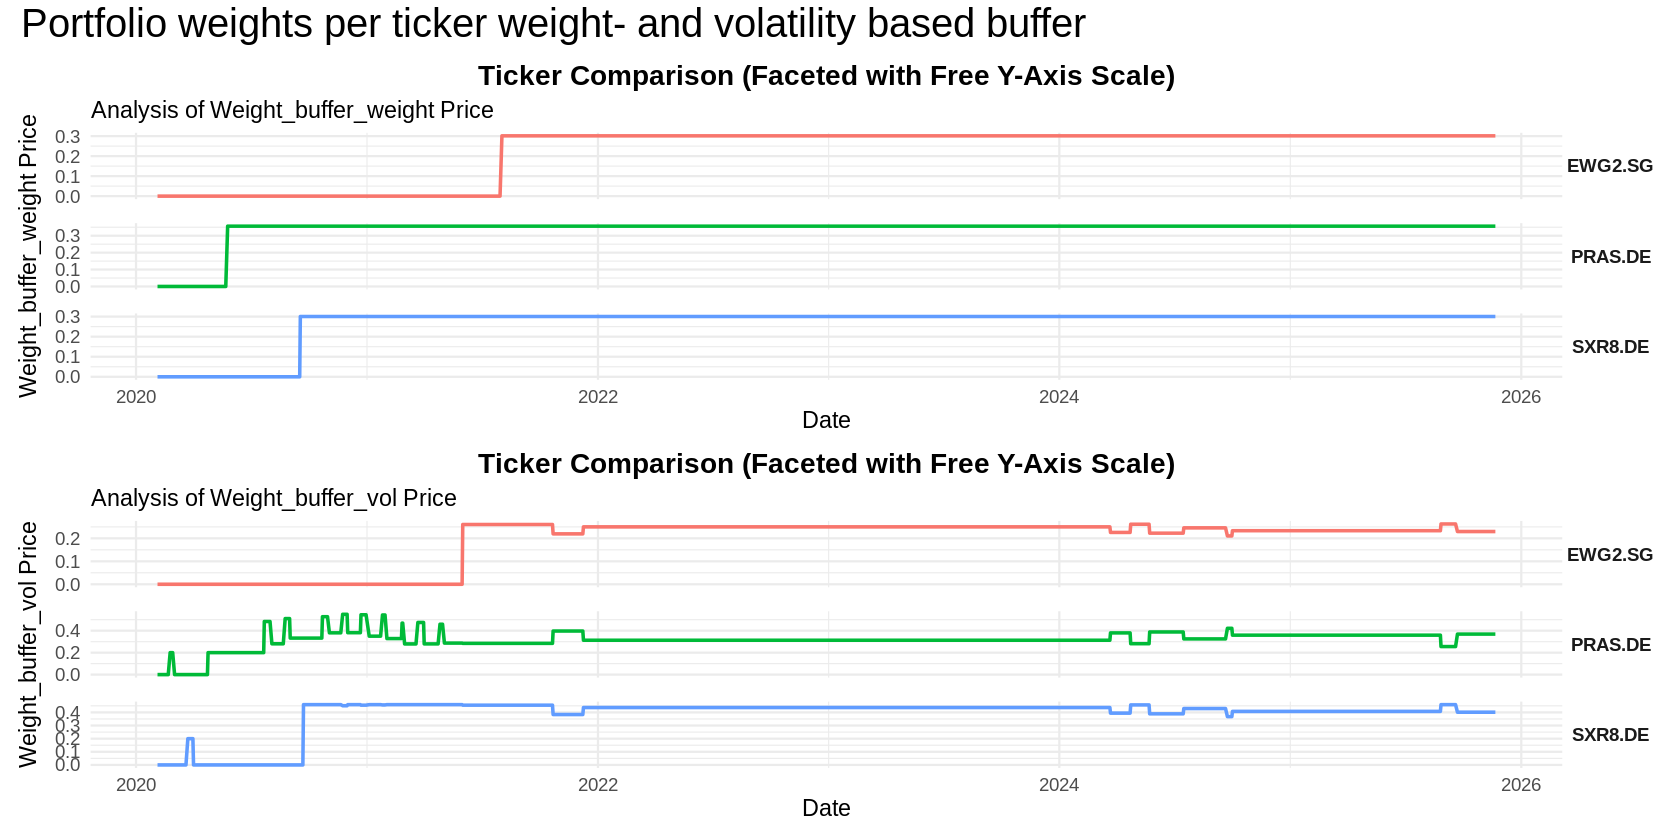

In [267]:
p1 <- mq_plot_ticker_attribute(port_df, y_col = "weight_buffer_weight")

p2 <- mq_plot_ticker_attribute(port_df, y_col = "weight_buffer_vol")

p1 / p2 + plot_annotation(title = "Portfolio weights per ticker weight- and volatility based buffer")

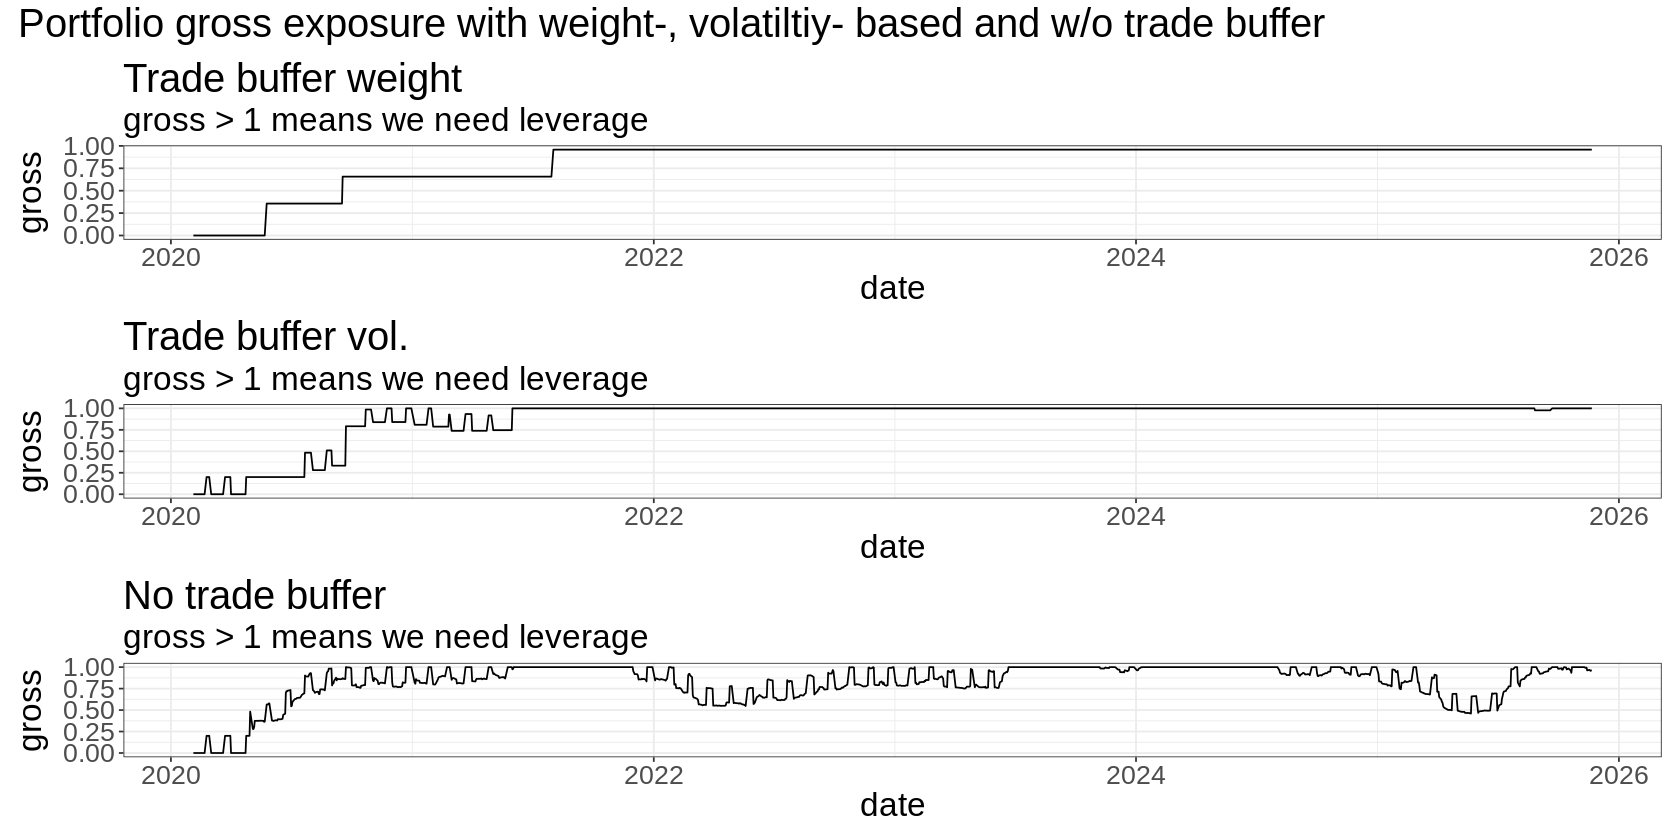

In [268]:
p1 <- port_df %>%
  group_by(date) %>%
  summarise(gross = sum(abs(weight_buffer_weight))) %>%
  ggplot(aes(x = date, y = gross)) + geom_line() + labs(title = "Trade buffer weight", subtitle = "gross > 1 means we need leverage")

p2 <- port_df %>%
  group_by(date) %>%
  summarise(gross = sum(abs(weight_buffer_vol))) %>%
  ggplot(aes(x = date, y = gross)) + geom_line() + labs(title = "Trade buffer vol.", subtitle = "gross > 1 means we need leverage")

p3 <- port_df %>%
  group_by(date) %>%
  summarise(gross = sum(abs(weight))) %>%
  ggplot(aes(x = date, y = gross)) + geom_line() + labs(title = "No trade buffer", subtitle = "gross > 1 means we need leverage")


p1 / p2 / p3 + plot_annotation(title = "Portfolio gross exposure with weight-, volatiltiy- based and w/o trade buffer")

Let's tidy up by selecting the columns we'll need for the next bit

## Make data for simulation

Now we need to make our inputs for backtesting with `rsims`. It requires a series of matrixes for weights, prices, interest rates and unadjusted prices (for accurately calculating commissions).


# port_df for tradebuffer size optimization

In [269]:
# prices
sim_prices <- port_df %>%
  select(ticker, date, adjusted) %>%
  pivot_wider(date, names_from = ticker, values_from = adjusted) %>%
  data.matrix()
#for accurately calculating historical commissions
sim_unadj_prices <- port_df %>%
  select(ticker, date, close) %>%
  pivot_wider(id_cols = date, names_from = ticker, values_from = close) %>%
  data.matrix()

Warning message:
“Specifying the `id_cols` argument by position was deprecated in tidyr 1.3.0.
ℹ Please explicitly name `id_cols`, like `id_cols = date`.”


It's helpful to visualise our target weights at the portfolio level by ticker, and the overall leverage on the portfolio:

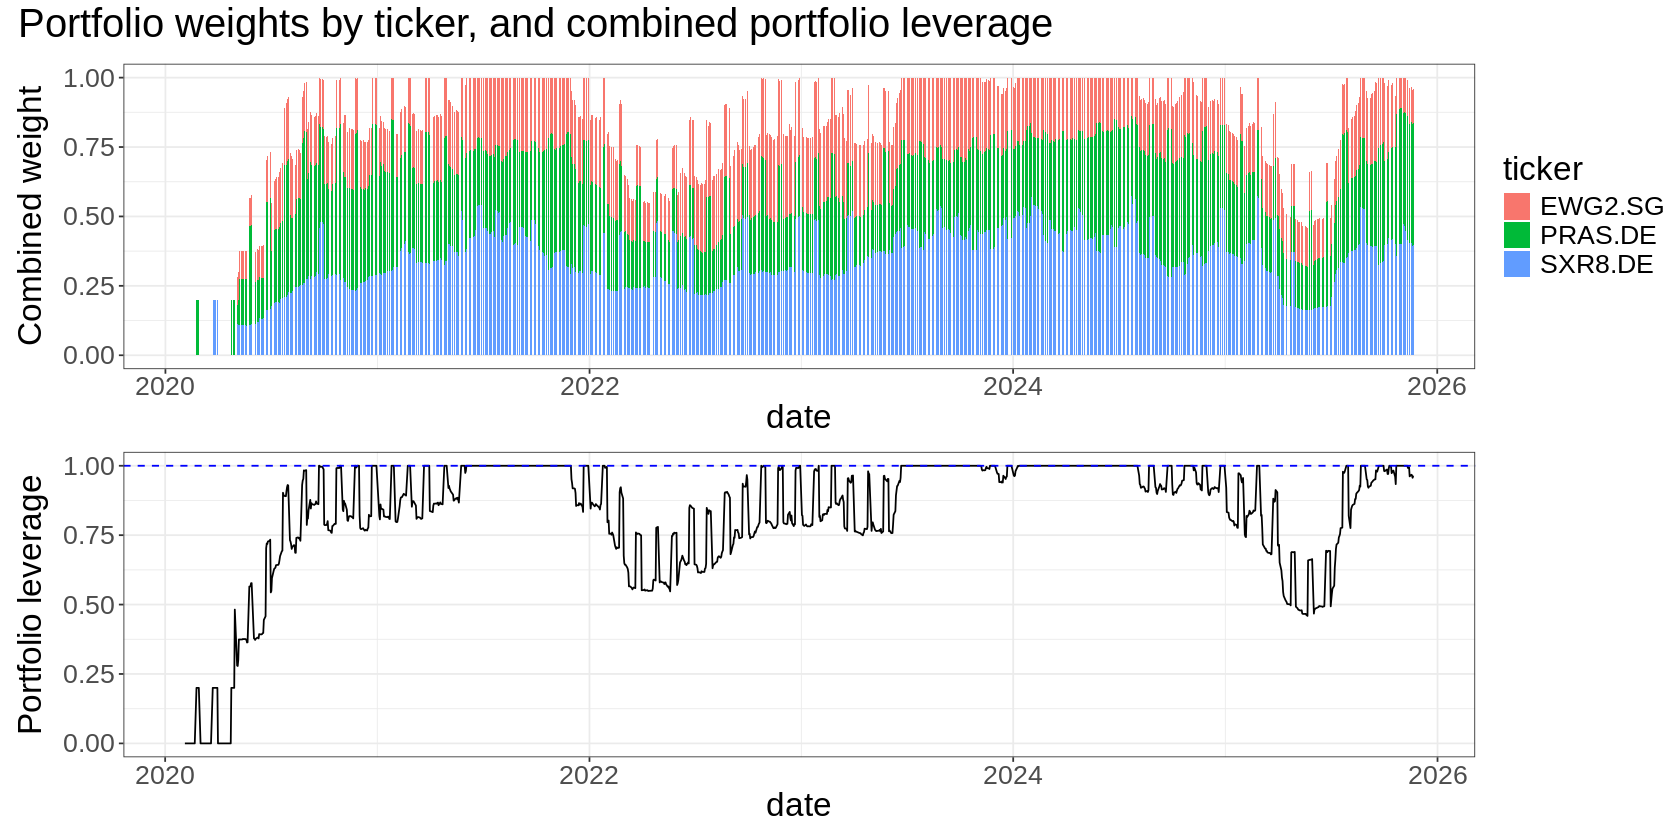

In [270]:
p1 <- port_df %>%
  ggplot(aes(x = date, y = weight, fill = ticker)) +
  geom_bar(stat = "identity") +
  labs(y = "Combined weight")

p2 <- port_df %>%
  group_by(date) %>%
  summarise(portfolio_leverage = sum(weight)) %>%
  ggplot(aes(x = date, y = portfolio_leverage)) +
  geom_line() +
  geom_hline(yintercept = 1, linetype = 'dashed', colour = "blue") +
  labs(y = "Portfolio leverage")

p1 / p2 + plot_annotation(title = "Portfolio weights by ticker, and combined portfolio leverage")

Now we can convert these portfolio weights to a target weights matrix for rsims:

In [224]:
target_weights_weightBuffer <- port_df %>%
  select(ticker, date, weight_buffer_weight) %>%
  pivot_wider(id_cols = date, names_from = ticker, values_from = weight_buffer_weight) %>%
  data.matrix()

target_weights_volBuffer <- port_df %>%
  select(ticker, date, weight_buffer_vol) %>%
  pivot_wider(id_cols = date, names_from = ticker, values_from = weight_buffer_vol) %>%
  data.matrix()

target_weights_tb <- port_df %>%
  select(ticker, date, weight) %>%
  pivot_wider(id_cols = date, names_from = ticker, values_from = weight) %>%
  data.matrix()

In [239]:
# Load necessary libraries
install.packages("tidyquant")
# We use tidyverse for data manipulation and tidyquant for convenient financial data functions.
library(tidyquant)
library(dplyr)
library(tidyr)
library(purrr)
#' @title Simple Weights-Based Backtesting Function
#' @description Calculates the cumulative performance (NAV) of a portfolio
#' based on a fixed set of weights applied to historical price data.
#'
#' @param price_data A data frame/tibble of historical prices.
#'   Must have a 'date' column and a column for each asset.
#' @param weights A named numeric vector where names correspond to the asset
#'   columns in price_data, and values are the portfolio weights (must sum to 1).
#' @return A tibble showing the date and the Portfolio's Net Asset Value (NAV).
simple_backtest_weights <- function(price_data, weights) {

  # --- 1. Data Validation ---
  if (!"date" %in% colnames(price_data)) {
    stop("Input 'price_data' must contain a column named 'date'.")
  }

  asset_names <- names(weights)
  missing_assets <- setdiff(asset_names, colnames(price_data))
  if (length(missing_assets) > 0) {
    stop(paste("The following assets in your 'weights' vector are missing from 'price_data':", paste(missing_assets, collapse = ", ")))
  }
  if (round(sum(weights), 5) != 1) {
    warning("Portfolio weights do not sum exactly to 1. Results may be scaled.")
  }

  # --- 2. Calculate Daily Returns (STABLE FIX) ---

  # Select the date and asset columns
  returns_data <- price_data %>%
    dplyr::select(date, dplyr::all_of(asset_names)) %>%

    # Calculate returns for all asset columns using the simple, vectorized formula:
    # (Price_t / Price_{t-1}) - 1
    dplyr::mutate(
      dplyr::across(
        .cols = dplyr::all_of(asset_names),
        .fns = ~ (.x / dplyr::lag(.x)) - 1, # Direct, Tidyverse-compatible return calculation
        .names = "{.col}_ret" # Rename columns dynamically (e.g., SPY -> SPY_ret)
      )
    ) %>%
    # Remove the original price columns
    dplyr::select(date, ends_with("_ret"))

  # The first row will be NA due to the lag calculation; remove it.
  returns_data <- returns_data %>% na.omit()

  # --- 3. Calculate Portfolio Daily Return ---

  # Ensure weights are in the same order as the return columns
  ordered_weights <- weights[asset_names]

  # Get the return column names (SPY_ret, BND_ret, etc.)
  ret_cols <- paste0(asset_names, "_ret")

  # Calculate weighted returns for each asset (R_i * W_i) and sum them up
  portfolio_returns <- returns_data %>%
    dplyr::rowwise() %>%
    dplyr::mutate(
      portfolio_ret = sum(
        dplyr::c_across(dplyr::all_of(ret_cols)) * ordered_weights,
        na.rm = TRUE
      )
    ) %>%
    dplyr::ungroup() %>%
    dplyr::select(date, portfolio_ret)

  # --- 4. Calculate Cumulative Performance (NAV) ---

  # Convert daily returns to Net Asset Value (NAV) starting at $100
  portfolio_nav <- portfolio_returns %>%
    dplyr::mutate(
      # The cumulative return is (1 + R1) * (1 + R2) * ...
      NAV = cumprod(1 + portfolio_ret),
      # Scale NAV to start at 100
      NAV = NAV / NAV[1] * 100
    ) %>%
    dplyr::select(date, NAV)

  return(portfolio_nav)
}


Fetching price data for SPY, BND from 2020-01-01 to 2025-11-24...
Running backtest...

Generating plot...


`geom_smooth()` using formula = 'y ~ x'


--- Backtest Complete ---
Final Portfolio NAV: 169.64
Total Return: 69.64%

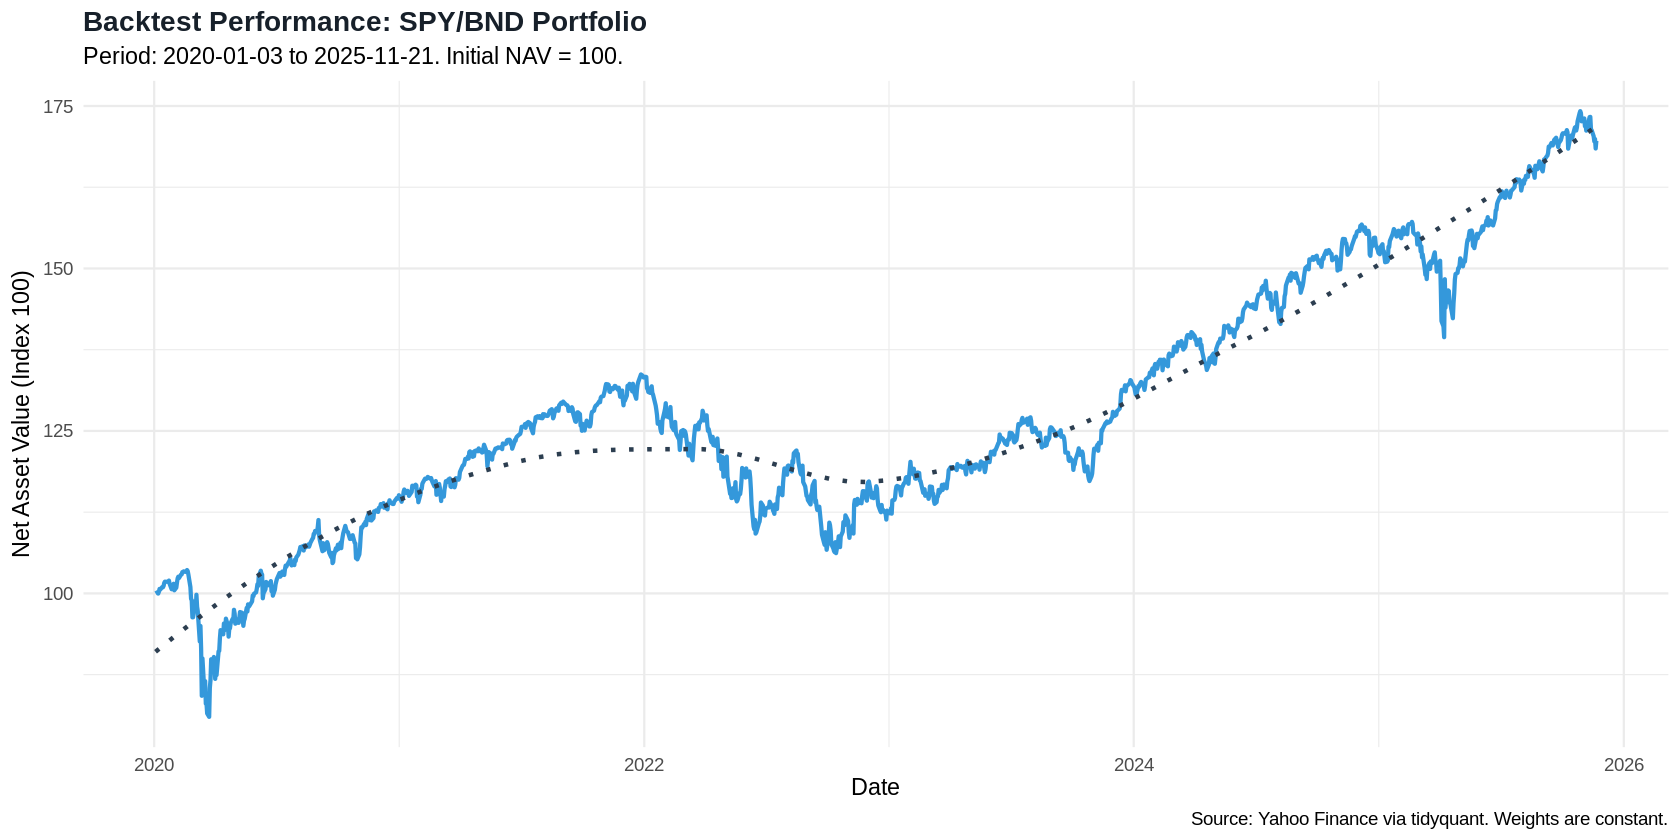

In [240]:
# =================================================================
# Example Usage: Backtesting a simple 60/40 Equity/Bond Portfolio
# =================================================================

# Define the assets and their weights (Must sum to 1)
# 60% S&P 500 (SPY), 40% US Bonds (BND)
portfolio_weights <- c(SPY = 0.60, BND = 0.40)
tickers <- names(portfolio_weights)
start_date <- "2020-01-01"
end_date <- Sys.Date()

# --- STEP 1: Fetch Historical Data ---
# Tidyquant downloads adjusted closing prices
cat(glue::glue("Fetching price data for {paste(tickers, collapse = ', ')} from {start_date} to {end_date}...\n"))

# Fetch data for all assets and pivot it to a wide format for the function
raw_prices <- tq_get(
  tickers,
  from = start_date,
  to = end_date,
  get = "stock.prices"
) %>%
  dplyr::select(symbol, date, adjusted) %>%
  tidyr::pivot_wider(names_from = symbol, values_from = adjusted)

# Handle NA values (e.g., if one asset traded but another didn't on a holiday)
# For simplicity, we use the last available price (LOCF: Last Observation Carried Forward)
price_data_cleaned <- raw_prices %>%
  na.locf(na.rm = TRUE)

# --- STEP 2: Run the Backtest ---
cat("\nRunning backtest...\n")
backtest_results <- simple_backtest_weights(
  price_data = price_data_cleaned,
  weights = portfolio_weights
)

# --- STEP 3: Visualize Results ---
cat("\nGenerating plot...\n")
# Trigger a diagram showing the general backtesting workflow.
#

performance_plot <- backtest_results %>%
  ggplot2::ggplot(ggplot2::aes(x = date, y = NAV)) +
  ggplot2::geom_line(color = "#3498DB", linewidth = 1.2) +
  ggplot2::geom_smooth(method = "loess", se = FALSE, color = "#2C3E50", linetype = "dotted") +
  ggplot2::labs(
    title = glue::glue("Backtest Performance: {names(portfolio_weights)[1]}/{names(portfolio_weights)[2]} Portfolio"),
    subtitle = glue::glue("Period: {min(backtest_results$date)} to {max(backtest_results$date)}. Initial NAV = 100."),
    caption = "Source: Yahoo Finance via tidyquant. Weights are constant.",
    x = "Date",
    y = "Net Asset Value (Index 100)"
  ) +
  ggplot2::theme_minimal(base_size = 14) +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold", color = "#17202A"))

print(performance_plot)

# Display final performance metric
final_nav <- tail(backtest_results$NAV, 1)
cat(glue::glue("\n--- Backtest Complete ---\nFinal Portfolio NAV: {round(final_nav, 2)}\nTotal Return: {round(final_nav - 100, 2)}%\n"))

In [ ]:

target_weights_weightBuffer <- port_df %>%
  select(ticker, date, weight_buffer_weight) %>%
  pivot_wider(id_cols = date, names_from = ticker, values_from = weight_buffer_weight) %>%
  data.matrix()

target_weights_volBuffer <- port_df %>%
  select(ticker, date, weight_buffer_vol) %>%
  pivot_wider(id_cols = date, names_from = ticker, values_from = weight_buffer_vol) %>%
  data.matrix()

target_weights_tb <- port_df %>%
  select(ticker, date, weight) %>%
  pivot_wider(id_cols = date, names_from = ticker, values_from = weight) %>%
  data.matrix()

# Fetch data for all assets and pivot it to a wide format for the function
raw_prices <- tq_get(
  tickers,
  from = start_date,
  to = end_date,
  get = "stock.prices"
) %>%
  dplyr::select(symbol, date, adjusted) %>%
  tidyr::pivot_wider(names_from = symbol, values_from = adjusted)

# Handle NA values (e.g., if one asset traded but another didn't on a holiday)
# For simplicity, we use the last available price (LOCF: Last Observation Carried Forward)
price_data_cleaned <- raw_prices %>%
  na.locf(na.rm = TRUE)

# --- STEP 2: Run the Backtest ---
cat("\nRunning backtest...\n")
backtest_results <- simple_backtest_weights(
  price_data = price_data_cleaned,
  weights = portfolio_weights
)

# --- STEP 3: Visualize Results ---
cat("\nGenerating plot...\n")
# Trigger a diagram showing the general backtesting workflow.
#

performance_plot <- backtest_results %>%
  ggplot2::ggplot(ggplot2::aes(x = date, y = NAV)) +
  ggplot2::geom_line(color = "#3498DB", linewidth = 1.2) +
  ggplot2::geom_smooth(method = "loess", se = FALSE, color = "#2C3E50", linetype = "dotted") +
  ggplot2::labs(
    title = glue::glue("Backtest Performance: {names(portfolio_weights)[1]}/{names(portfolio_weights)[2]} Portfolio"),
    subtitle = glue::glue("Period: {min(backtest_results$date)} to {max(backtest_results$date)}. Initial NAV = 100."),
    caption = "Source: Yahoo Finance via tidyquant. Weights are constant.",
    x = "Date",
    y = "Net Asset Value (Index 100)"
  ) +
  ggplot2::theme_minimal(base_size = 14) +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold", color = "#17202A"))

print(performance_plot)

# Display final performance metric
final_nav <- tail(backtest_results$NAV, 1)
cat(glue::glue("\n--- Backtest Complete ---\nFinal Portfolio NAV: {round(final_nav, 2)}\nTotal Return: {round(final_nav - 100, 2)}%\n"))

### Interest rate data

Again we'll use 13-week t-bills as our benchmark interest rate.

In [225]:
interest_rates <- mq_get_tbill_rate_matrix(port_df)

Warning message:
“^IRX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


# Trade buffer
Position deltas are calculated using the trade buffer approach. Positions are rebalanced once they deviate from their target by more than a user-supplied trade_buffer. Rebalancing happens slightly differently depending on the commission model used:

for minimum commission backtesting, rebalance back to the target weight

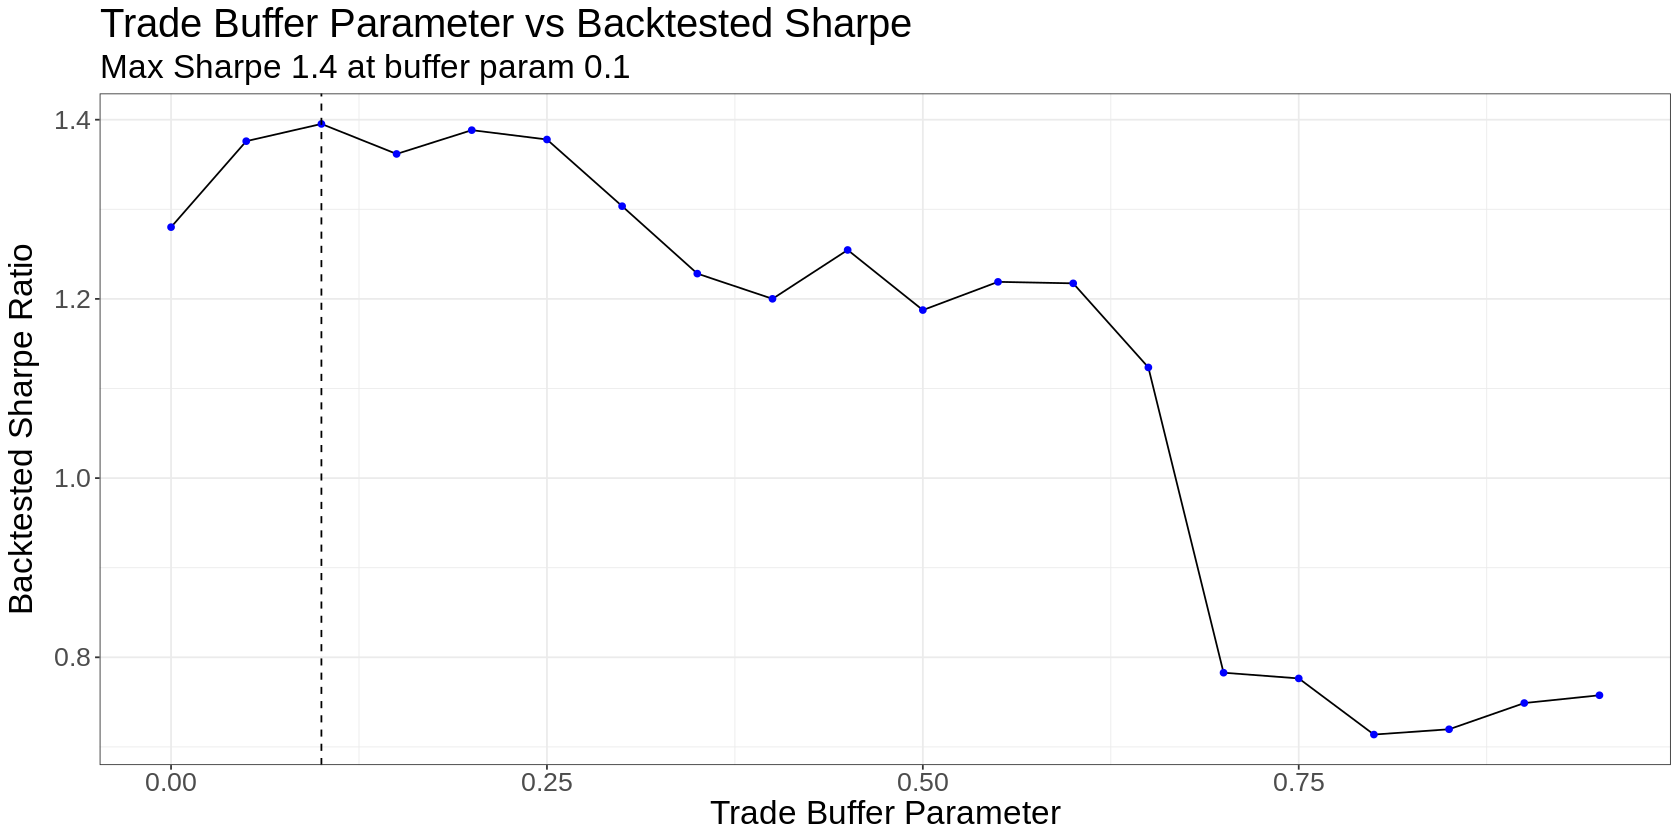

In [189]:
# find appropriate trade buffer by optimising historical sharpe
initial_cash	= 60000
sharpes <- list()
trade_buffers <- seq(0, 0.95, by = 0.05)
for(trade_buffer in trade_buffers) {
  these_results <- min_commission_backtest(
    prices = sim_prices,
    unadjusted_prices = sim_unadj_prices,
    target_weights = target_weights_tb,
    interest_rates = interest_rates,
    short_borrow_costs = NULL,
    trade_buffer = trade_buffer,
    initial_cash = initial_cash,
    capitalise_profits = TRUE,
    commission_fun = us_tiered_commission,
    max_pct_per_order = 0.01,
    min_dollars_per_order = 1,
    dollars_per_share = 0.005
  )

  sharpes <- c(
    sharpes,
    these_results %>% calc_sharpe()
  )
}

sharpes <- unlist(sharpes)
data.frame(
  trade_buffer = trade_buffers,
  sharpe = sharpes
) %>%
  ggplot(aes(x = trade_buffer, y = sharpe)) +
    geom_line() +
    geom_point(colour = "blue") +
    geom_vline(xintercept = trade_buffers[which.max(sharpes)], linetype = "dashed") +
    labs(
      x = "Trade Buffer Parameter",
      y = "Backtested Sharpe Ratio",
      title = glue::glue("Trade Buffer Parameter vs Backtested Sharpe"),
      subtitle = glue::glue("Max Sharpe {round(max(sharpes), 2)} at buffer param {trade_buffers[which.max(sharpes)]}")
    )

## Simulation rebalance based trade buffer weights

In [190]:
library(purrr)


# --- Function to Run a Single Backtest (Now accepting trade_buffer) ---
# This function is flexible and takes all required inputs as arguments.
run_single_backtest <- function(
    target_weights_df,
    trade_buffer, # <--- NEW VARIABLE INPUT
    sim_prices,
    sim_unadj_prices,
    interest_rates,
    initial_cash
) {

  # Your backtest call
  results <- min_commission_backtest(
    prices = sim_prices,
    unadjusted_prices = sim_unadj_prices,
    target_weights = target_weights_df,
    interest_rates = interest_rates,
    short_borrow_costs = NULL,
    trade_buffer = trade_buffer, # <--- Now uses the dynamic input
    initial_cash = initial_cash,
    capitalise_profits = TRUE,
    commission_fun = us_tiered_commission,
    max_pct_per_order = 0.01,
    min_dollars_per_order = 1,
    dollars_per_share = 0.005
  )

  return(results)
}

# --- Example of Setting Up and Running the Loop with Variable Parameters ---

# 1. Create a List of Configurations (Config Structure)
# Each element in the list is a strategy, containing both the weights and the buffer value.
# Replace the placeholder dataframes (target_weights_df_A, etc.) with your actual data.
strats <- list(
  "strategy_wo_buffer" = list(
    weights = target_weights_tb,
    buffer = 0.3,
    col_name = "weight"
  ),
  # --- THIS IS THE STRATEGY WITH THE CHANGED PARAMETER ---
  "strategy_weight_buffer" = list(
    weights = target_weights_weightBuffer,
    buffer = 0.03,
    col_name = "weight_buffer_weight"
  ),
  "strategy_vol_buffer" = list(
    weights = target_weights_volBuffer,
    buffer = 0.03,
    col_name = "weight_buffer_vol"
  )
)

# 2. Run the Simulations Using map()
# We use an anonymous function (`~`) inside map to unpack the two dynamic inputs
# (weights and buffer) from the configuration list and pass them to the main function,
# along with all the constant inputs.

results_list <- purrr::map(
  .x = strats,
  .f = function(strat) {
    run_single_backtest(
      target_weights_df = strat$weights, # Pass the weights
      trade_buffer = strat$buffer,       # Pass the variable buffer
      sim_prices = sim_prices,
      sim_unadj_prices = sim_unadj_prices,
      interest_rates = interest_rates,
      initial_cash = initial_cash
    )
  }
)
#list2env(results_list, envir = .GlobalEnv)

# To combine all results:
#combined_results_df <- dplyr::bind_rows(results_list, .id = "Source_Strategy")
#head(combined_results_df)

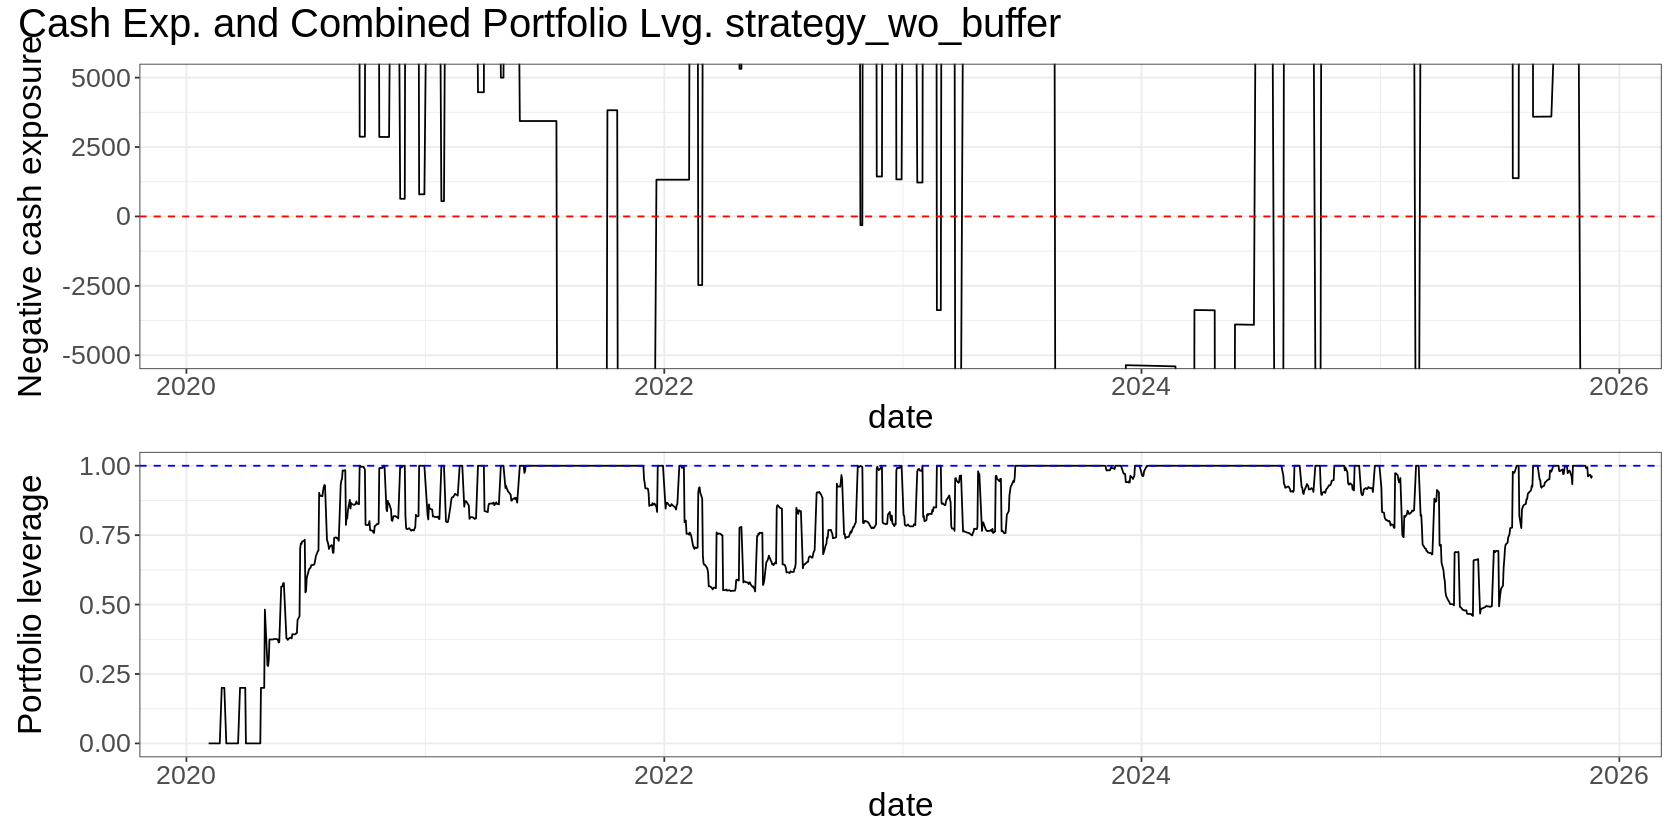

[[1]]

[[2]]

[[3]]


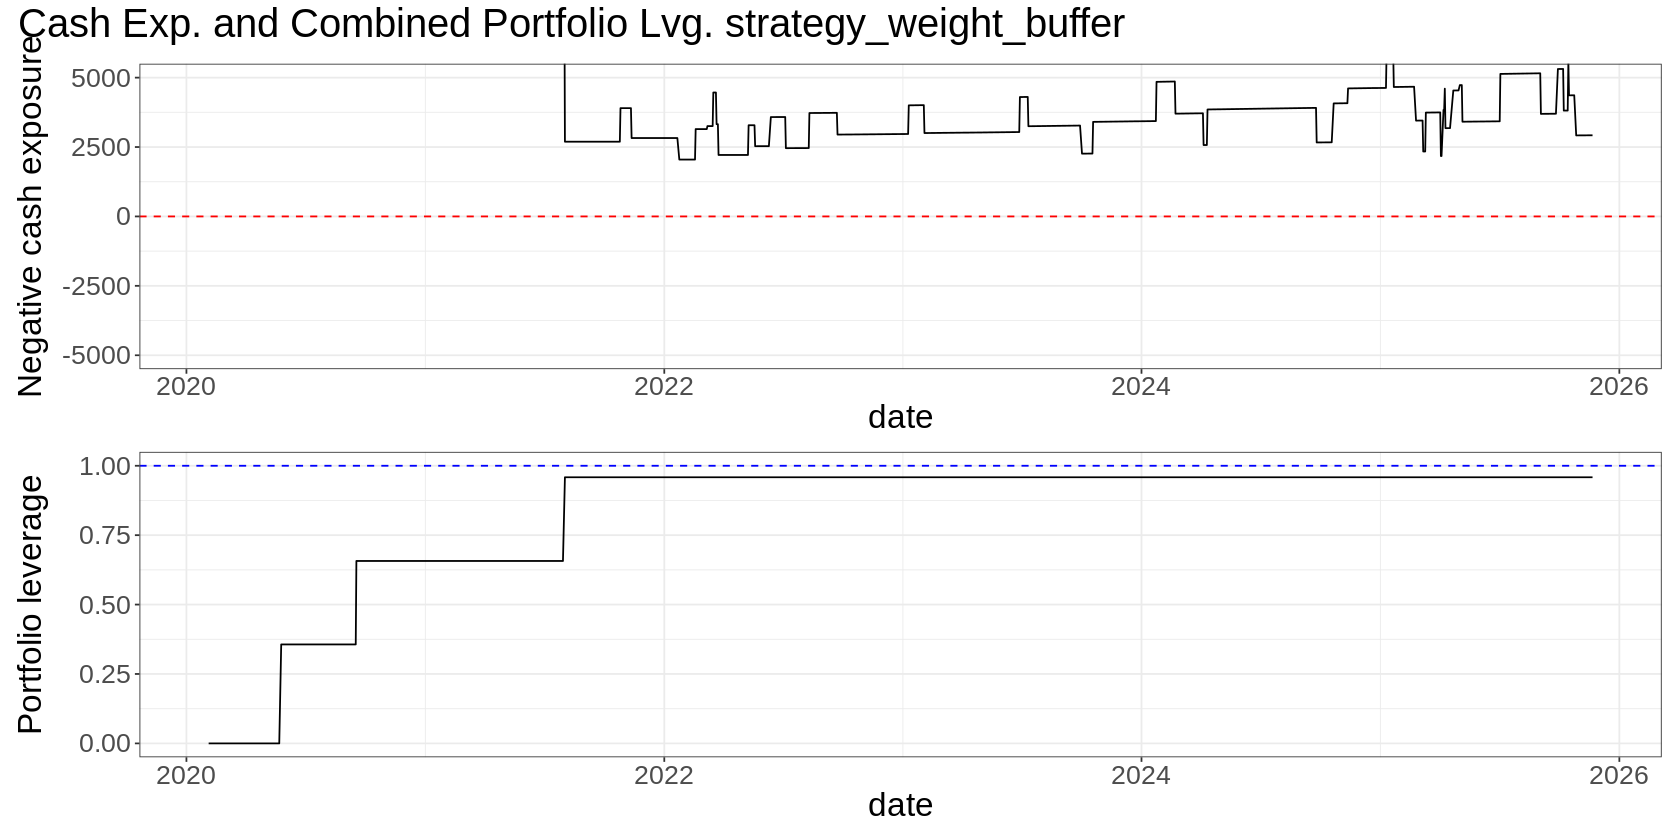

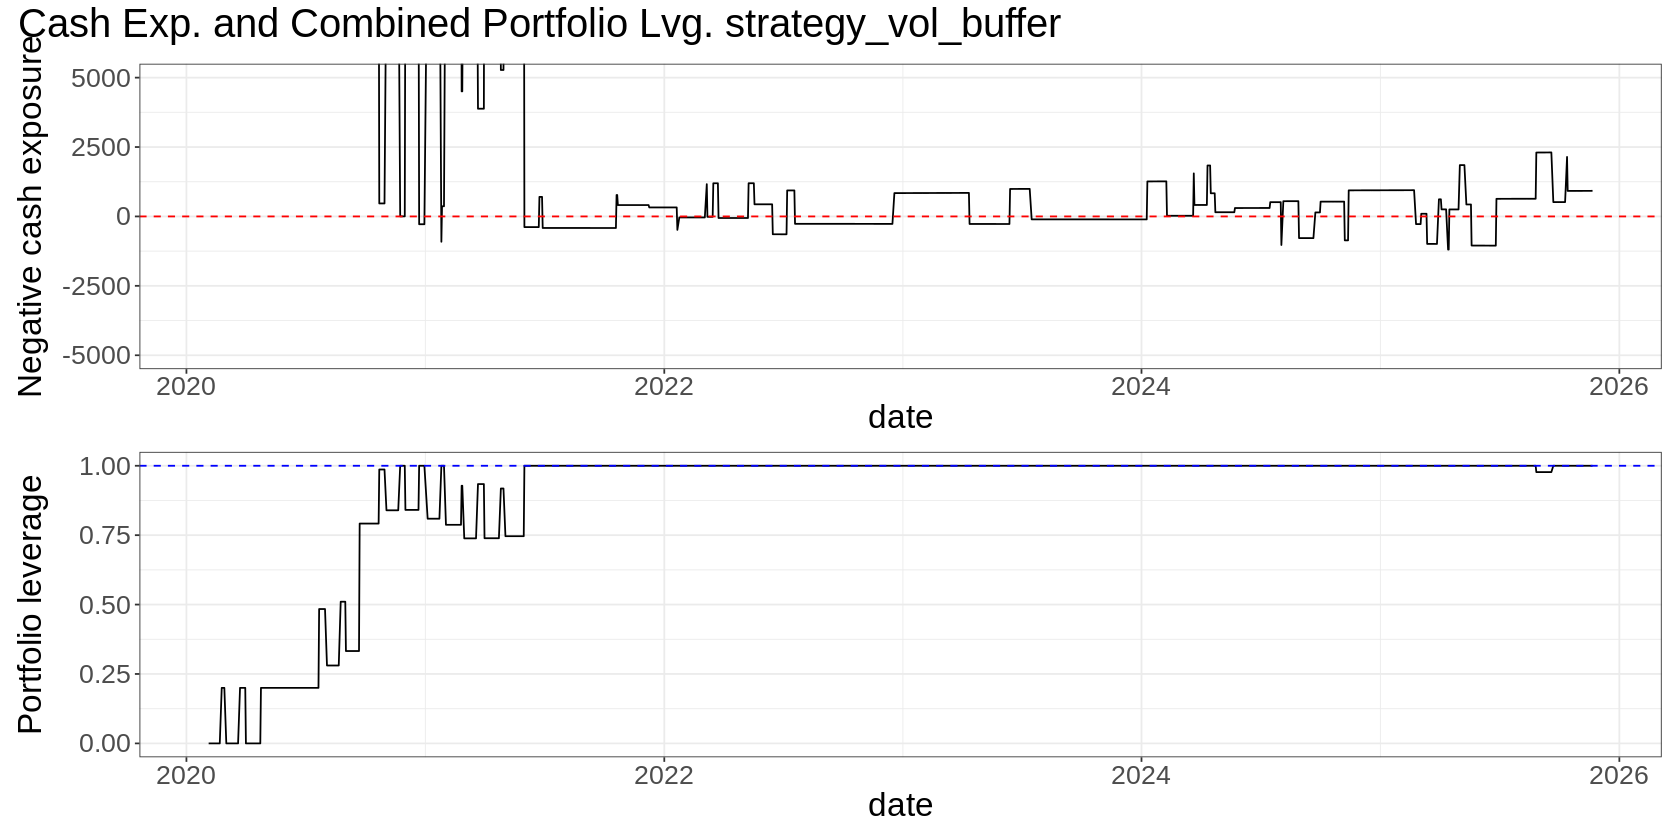

In [191]:
strategy_names <- names(strats)
library(glue)
purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_cashexposure_leverage(
      port_df = port_df,
      results_list[[strategy_name]],
      strats[[strategy_name]]$col_name,
      strategy_name
    )
  }
)


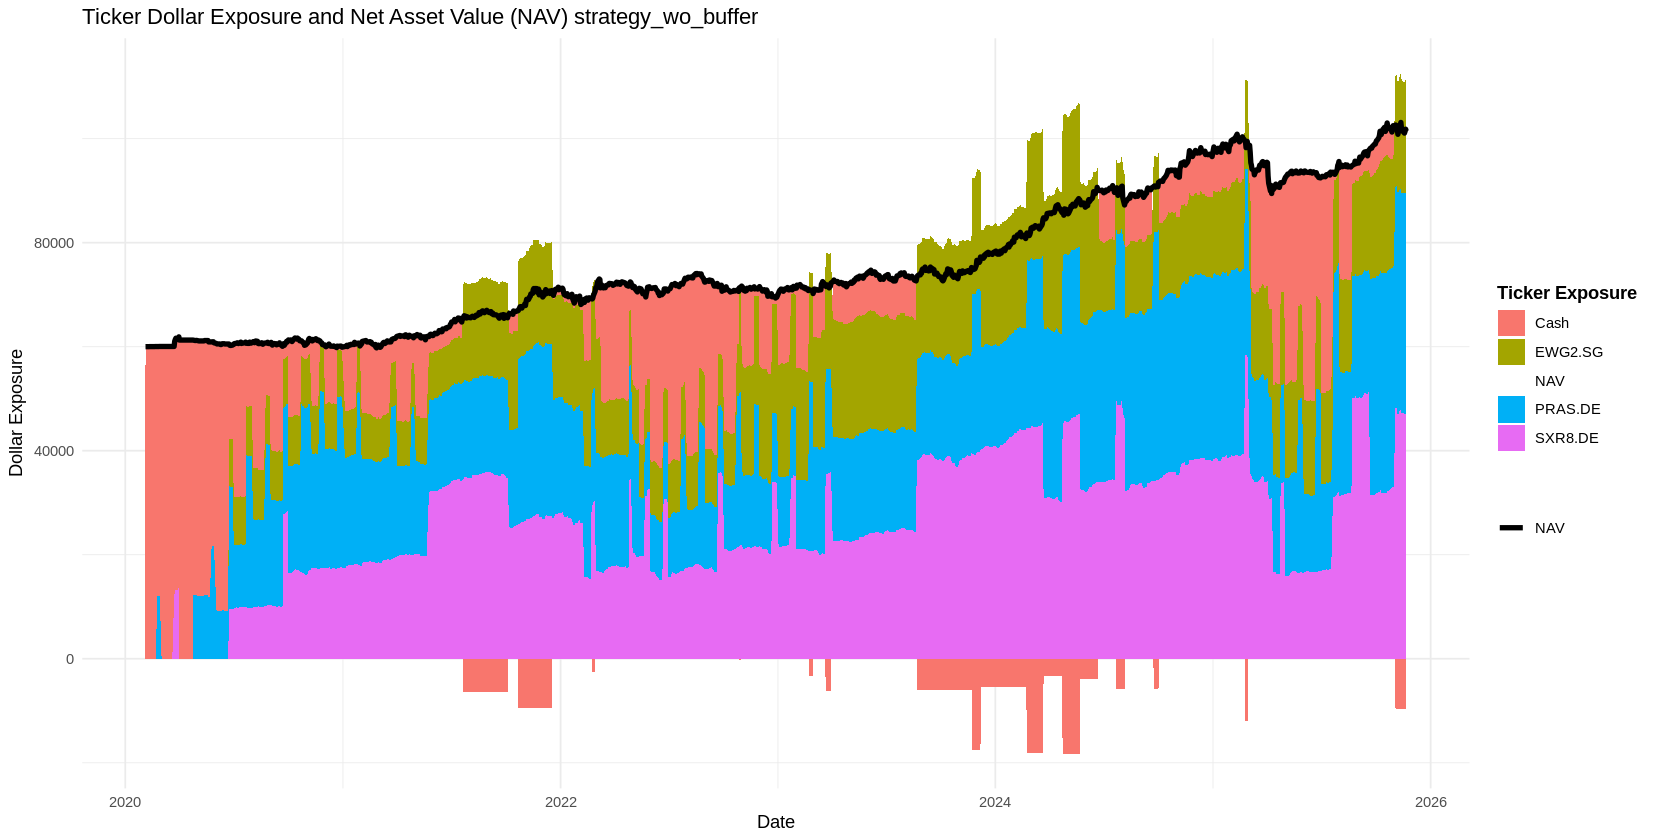

[[1]]

[[2]]

[[3]]


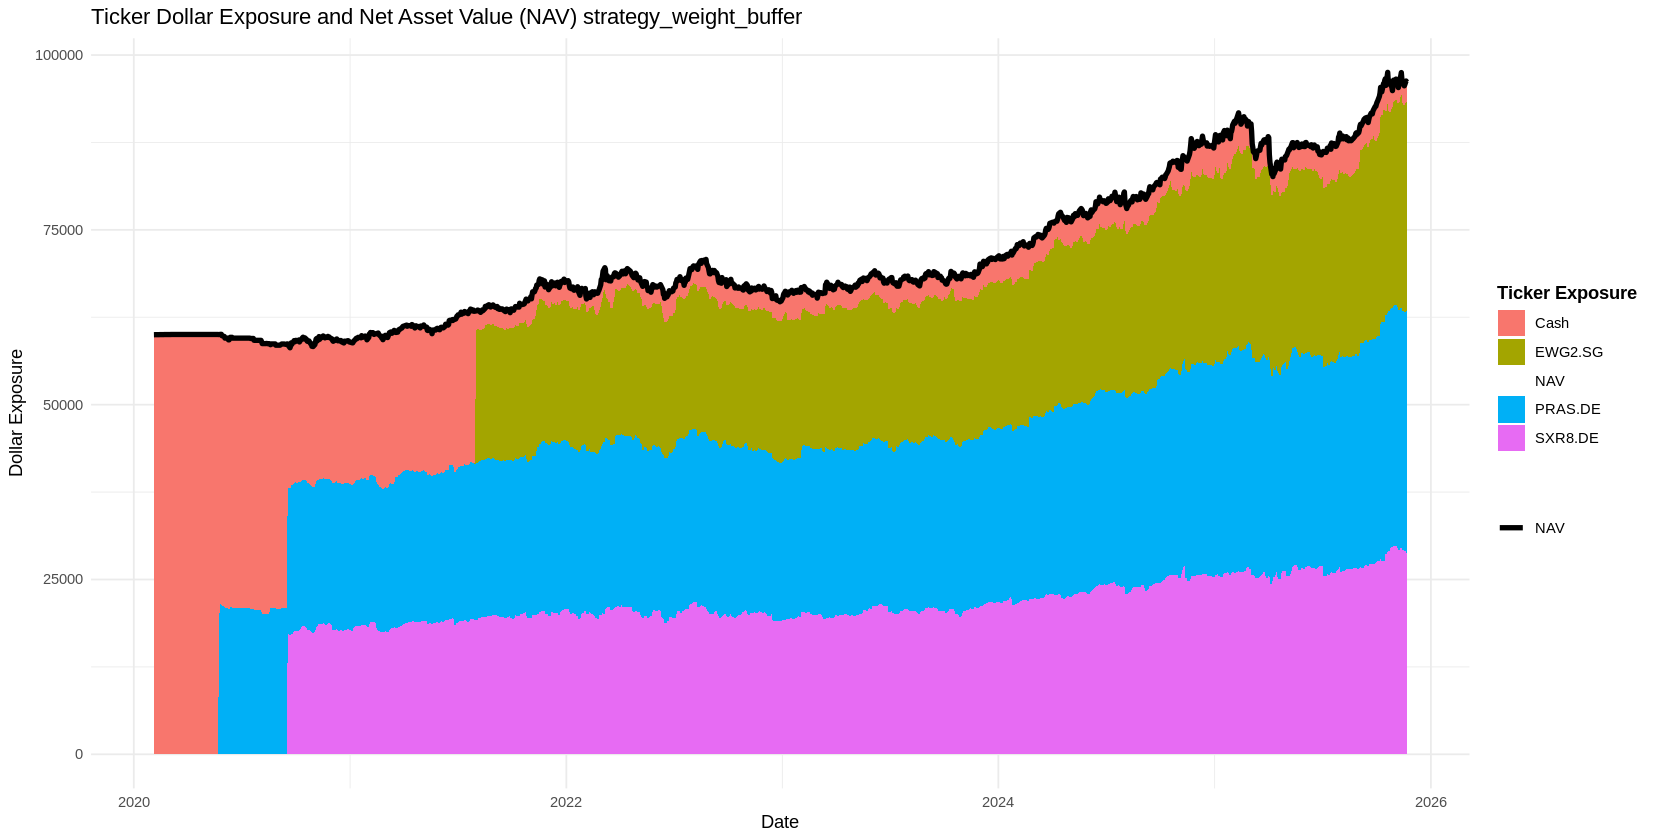

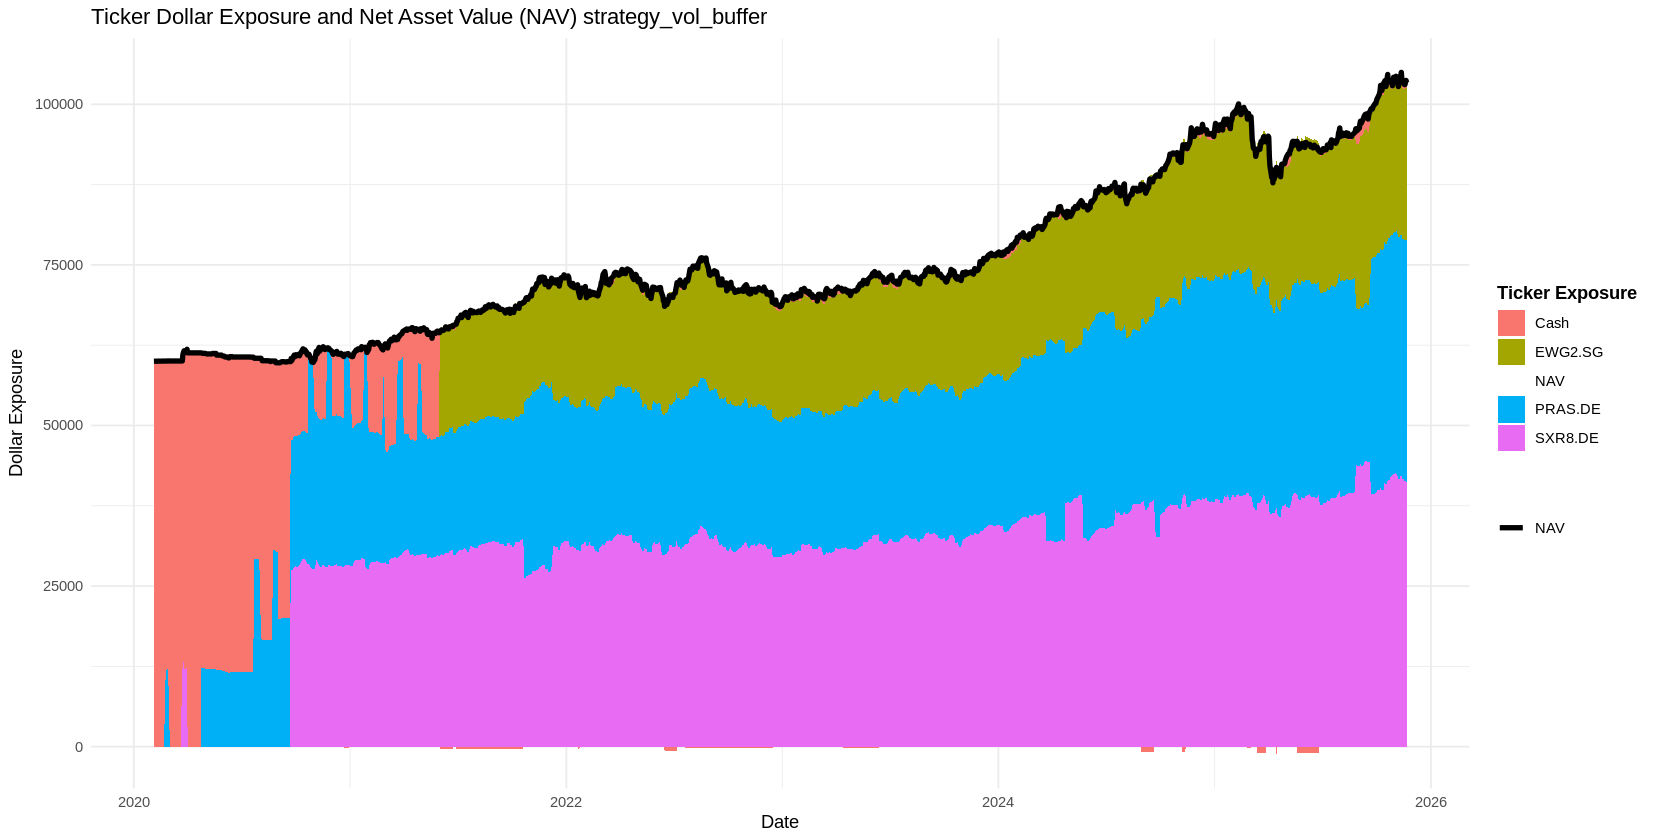

In [192]:
purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_plot_NAV_ticker_exposure(
      results_list[[strategy_name]],
      strategy_name
    )
  }
)

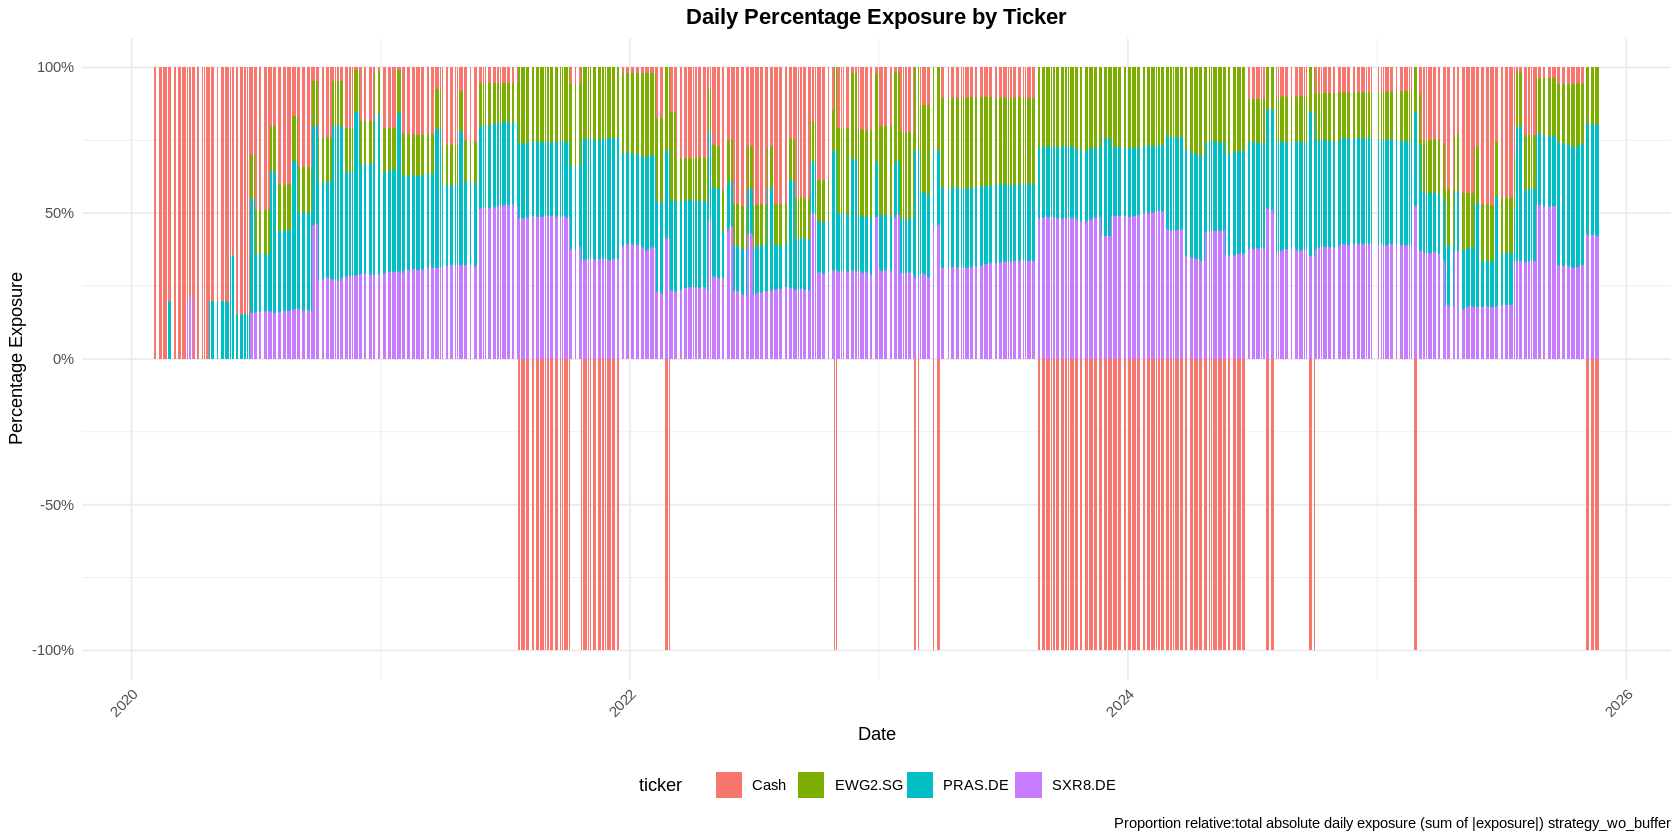

[[1]]

[[2]]

[[3]]


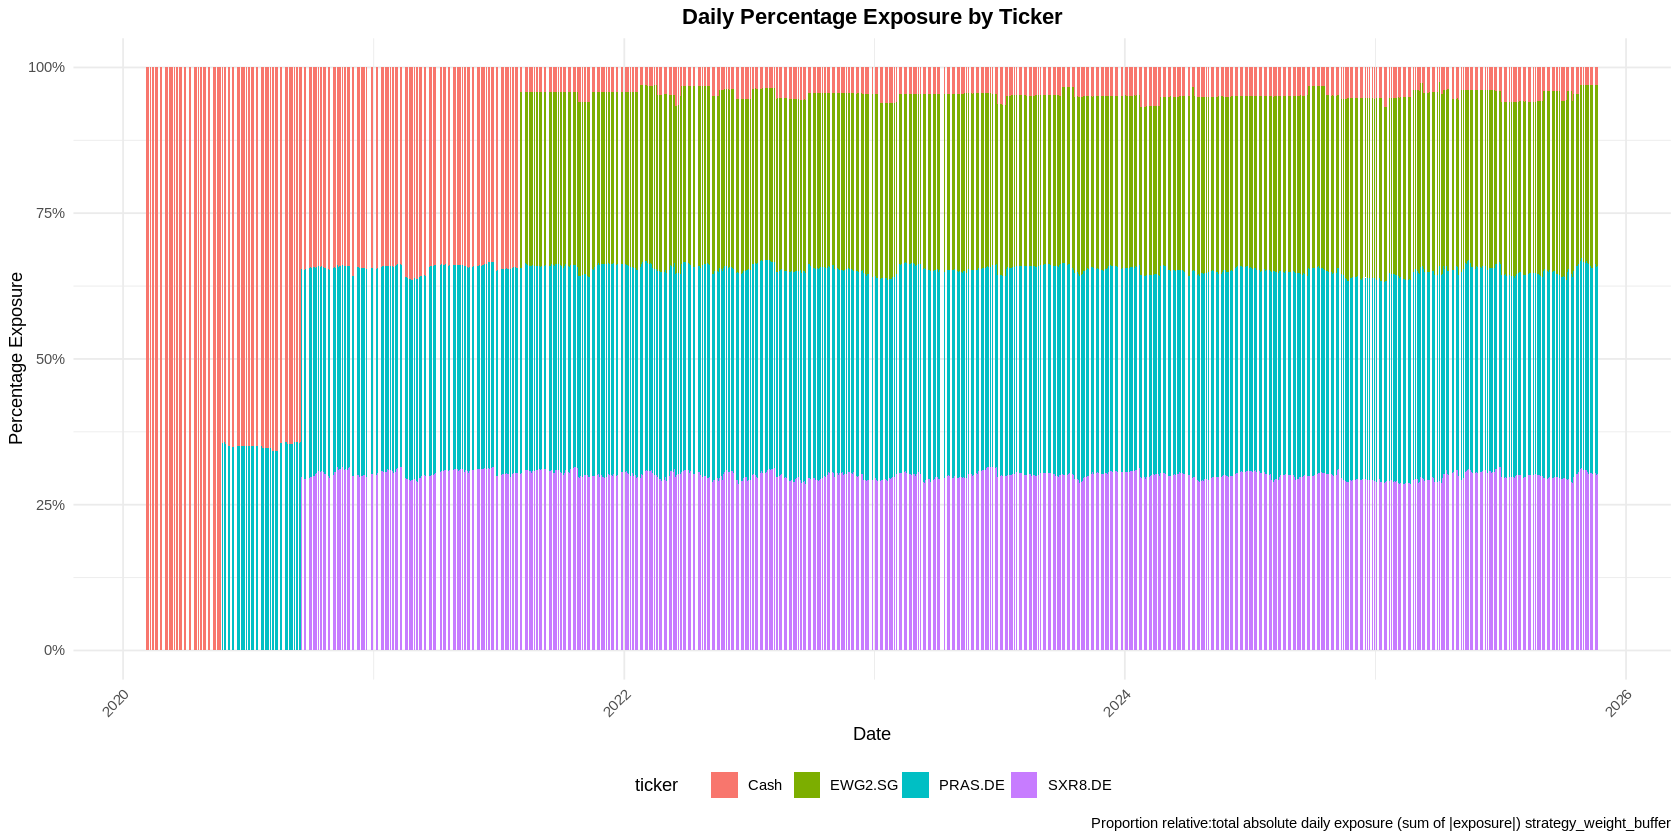

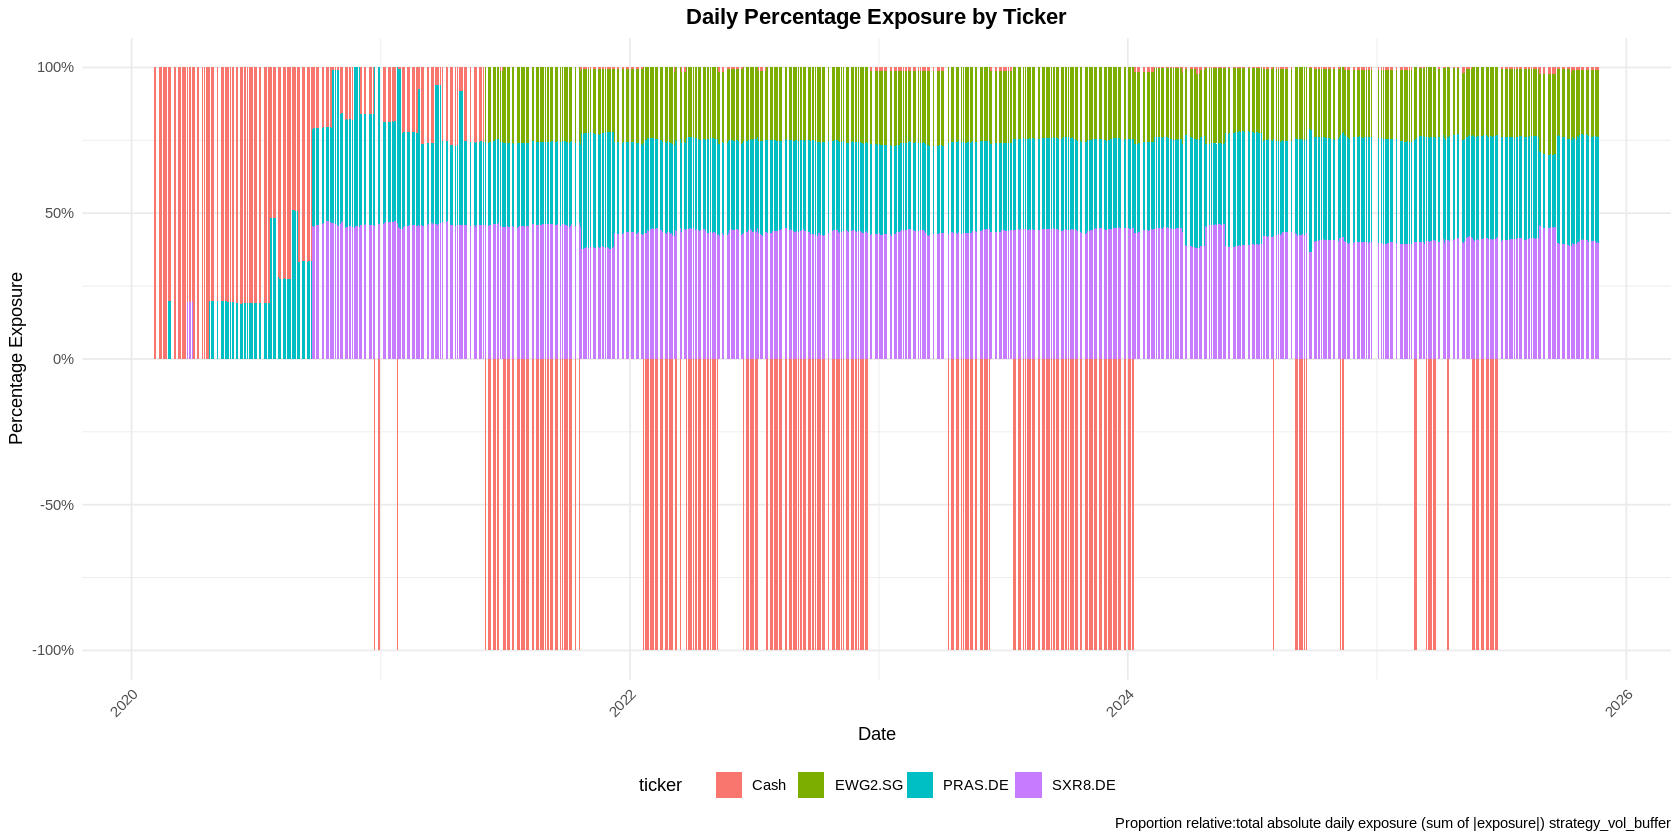

In [193]:
purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_percentage_exposure(
      results_list[[strategy_name]],
      strategy_name
    )
  }
)

In [194]:
out <- purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_summarystats(
      results_list[[strategy_name]],
      strategy_name
    )
  }
)

dplyr::bind_rows(out, .id = "Source_Strategy")

Source_Strategy Strategy               Annualized Return Annual Volatility
1 1               strategy_wo_buffer     9.35%             7.05%            
2 2               strategy_weight_buffer 8.36%             6.83%            
3 3               strategy_vol_buffer    9.71%             7.81%            
  Sharpe Ratio Max Drawdown Calmar Ratio Value-at-Risk (5%) Skewness Kurtosis
1 1.3264       11.30%       0.8275       -0.72%             -0.4375  3.5407  
2 1.2226       9.94%        0.8410       -0.69%             -0.3524  3.4572  
3 1.2424       12.27%       0.7911       -0.80%             -0.4145  3.1603

In [143]:
purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_ticker_stats(
      results_list[[strategy_name]],
      strategy_name
    )
  }
)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Daily.Log.Return = log(exposure/dplyr::lag(exposure))`.
ℹ In group 1: `ticker = "Cash"`.
Caused by warning in `log()`:
! NaNs produced”


## Ticker-Specific Trade & Commission Summary. strategy_wo_buffer


Table: Summary of Trading Activity and Commission Impact per Asset (Commissions vs. Total Dollar Return)

|Ticker  | Total Trades| Total Commissions| Total Return| Commission / Return Ratio|
|:-------|------------:|-----------------:|------------:|-------------------------:|
|Cash    |            0|             $0.00|  -$69,640.63|                     0.00%|
|EWG2.SG |            5|             $5.00|   $21,774.16|                     0.02%|
|PRAS.DE |           49|           $188.62|   $42,788.88|                     0.44%|
|SXR8.DE |           39|            $39.00|   $46,518.08|                     0.08%|
## Ticker-Specific Trade & Commission Summary. strategy_weight_buffer


Table: Summary of Trading Activity and Commission Impact per Asset (Commissions vs. Total Dollar Return)

|Ticker  | Total Trades| Total Commissions| Total Return| Commission / Return Ratio|
|:-------|------------:|-----------------:|----------

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Daily.Log.Return = log(exposure/dplyr::lag(exposure))`.
ℹ In group 1: `ticker = "Cash"`.
Caused by warning in `log()`:
! NaNs produced”


## Ticker-Specific Trade & Commission Summary. strategy_vol_buffer


Table: Summary of Trading Activity and Commission Impact per Asset (Commissions vs. Total Dollar Return)

|Ticker  | Total Trades| Total Commissions| Total Return| Commission / Return Ratio|
|:-------|------------:|-----------------:|------------:|-------------------------:|
|Cash    |            0|             $0.00|  -$59,620.58|                     0.00%|
|EWG2.SG |           24|            $24.60|   $22,121.62|                     0.11%|
|PRAS.DE |           38|            $86.22|   $43,250.12|                     0.20%|
|SXR8.DE |           43|            $43.00|   $37,948.96|                     0.11%|


[[1]]
# A tibble: 4 × 5
  Ticker  `Total Trades` `Total Commissions` `Total Return`
  <chr>            <int> <chr>               <chr>         
1 Cash                 0 $0.00               -$69,640.63   
2 EWG2.SG              5 $5.00               $21,774.16    
3 PRAS.DE             49 $188.62             $42,788.88    
4 SXR8.DE             39 $39.00              $46,518.08    
# ℹ 1 more variable: `Commission / Return Ratio` <chr>

[[2]]
# A tibble: 4 × 5
  Ticker  `Total Trades` `Total Commissions` `Total Return`
  <chr>            <int> <chr>               <chr>         
1 Cash                 0 $0.00               -$44,407.10   
2 EWG2.SG              0 $0.00               $0.00         
3 PRAS.DE             20 $24.50              $31,045.00    
4 SXR8.DE             25 $25.00              $39,173.12    
# ℹ 1 more variable: `Commission / Return Ratio` <chr>

[[3]]
# A tibble: 4 × 5
  Ticker  `Total Trades` `Total Commissions` `Total Return`
  <chr>            <int> <chr>               <chr>         
1 Cash                 0 $0.00               -$59,620.58   
2 EWG2.SG             24 $24.60              $22,121.62    
3 PRAS.DE             38 $86.22              $43,250.12    
4 SXR8.DE             43 $43.00              $37,948.96    
# ℹ 1 more variable: `Commission / Return Ratio` <chr>

In [144]:
out <- purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    summary_performance(
      results_list[[strategy_name]],
      initial_cash
    ) %>%
      mutate(Strategy= strategy_name)
  }
)

dplyr::bind_rows(out, .id = "Source_Strategy")

Source_Strategy Ann.Return(%) Ann.Volatility(%) Ann.Sharpe
1 1               9.191443      7.051427          1.3034871 
2 2               6.368880      7.427678          0.8574524 
3 3               9.628301      7.876031          1.2224814 
  Ave.Ann.Turnover(%) Tot.Profit($) Costs(%Profit) Strategy              
1 163.453810          41442.19      0.5613120      strategy_wo_buffer    
2   7.856854          25812.73      0.1917465      strategy_weight_buffer
3  57.272111          43701.83      0.3519876      strategy_vol_buffer

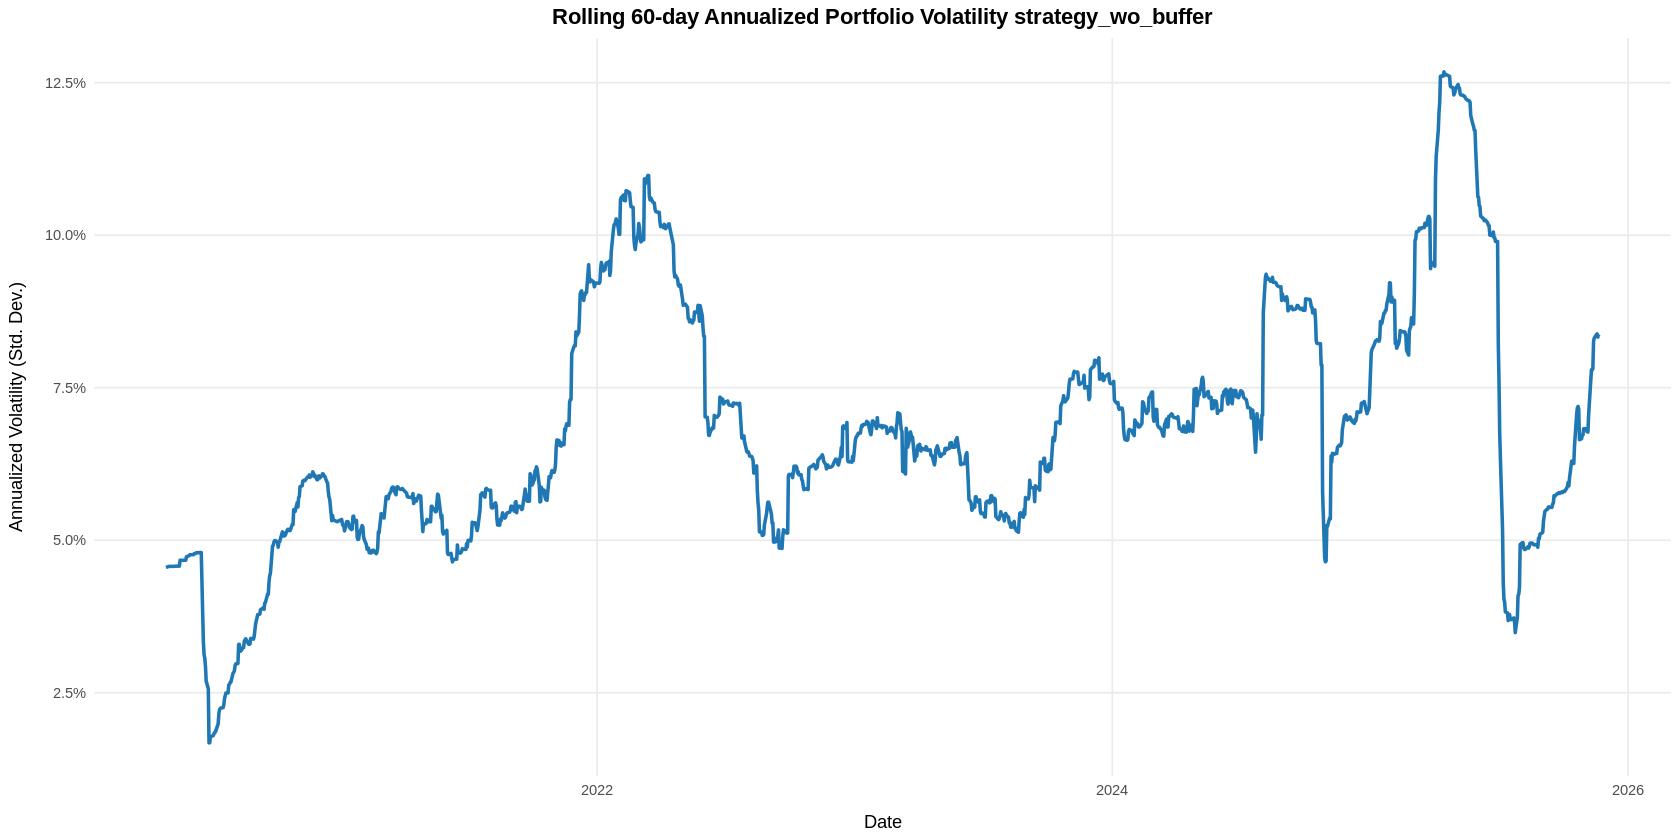

[[1]]

[[2]]

[[3]]


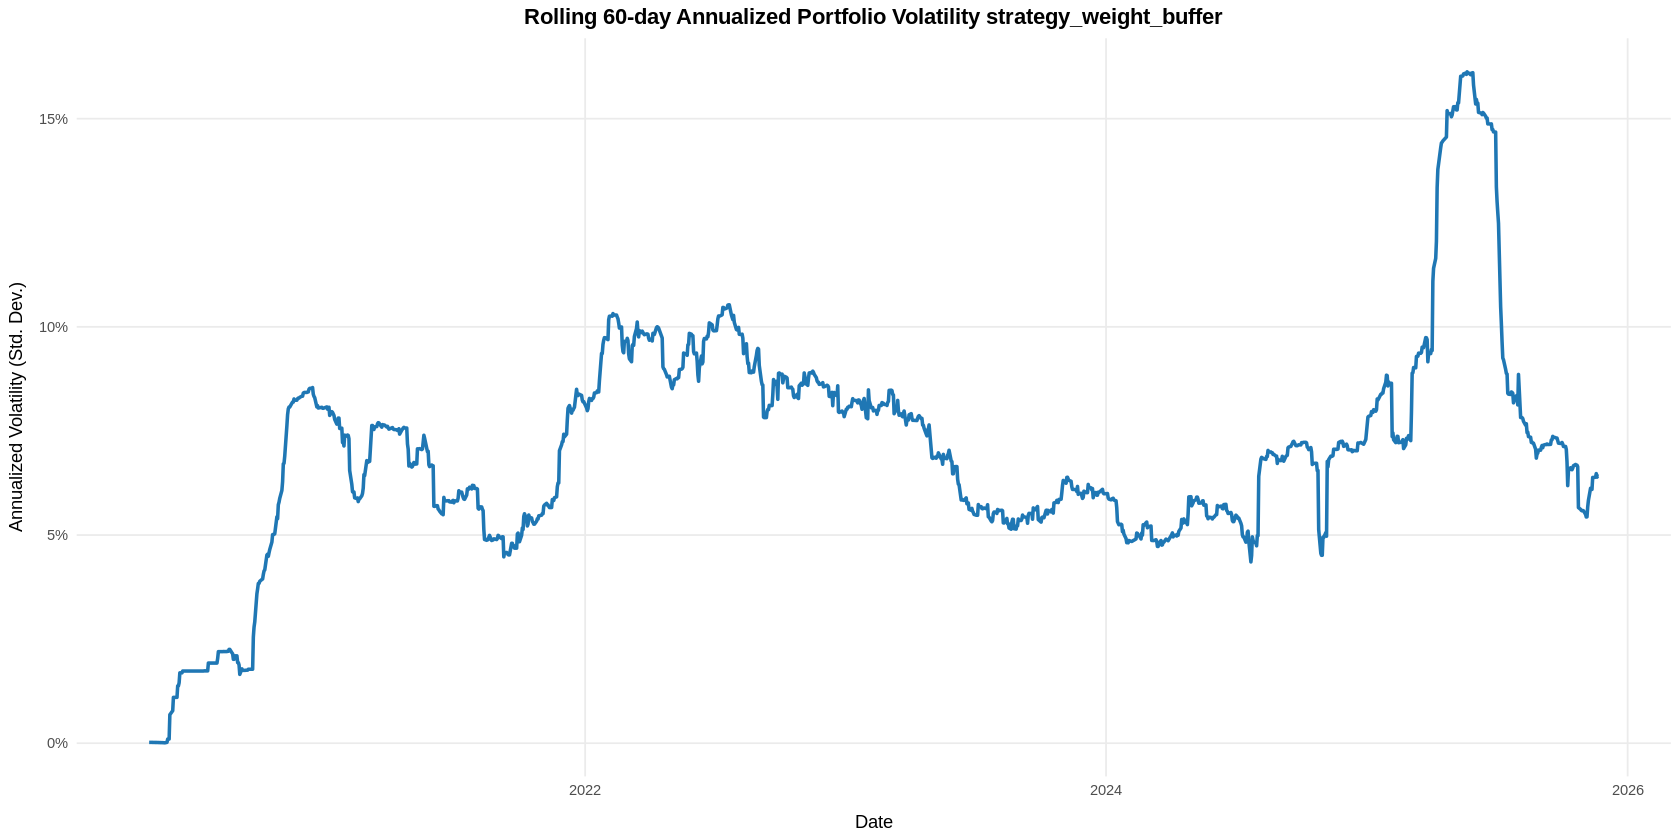

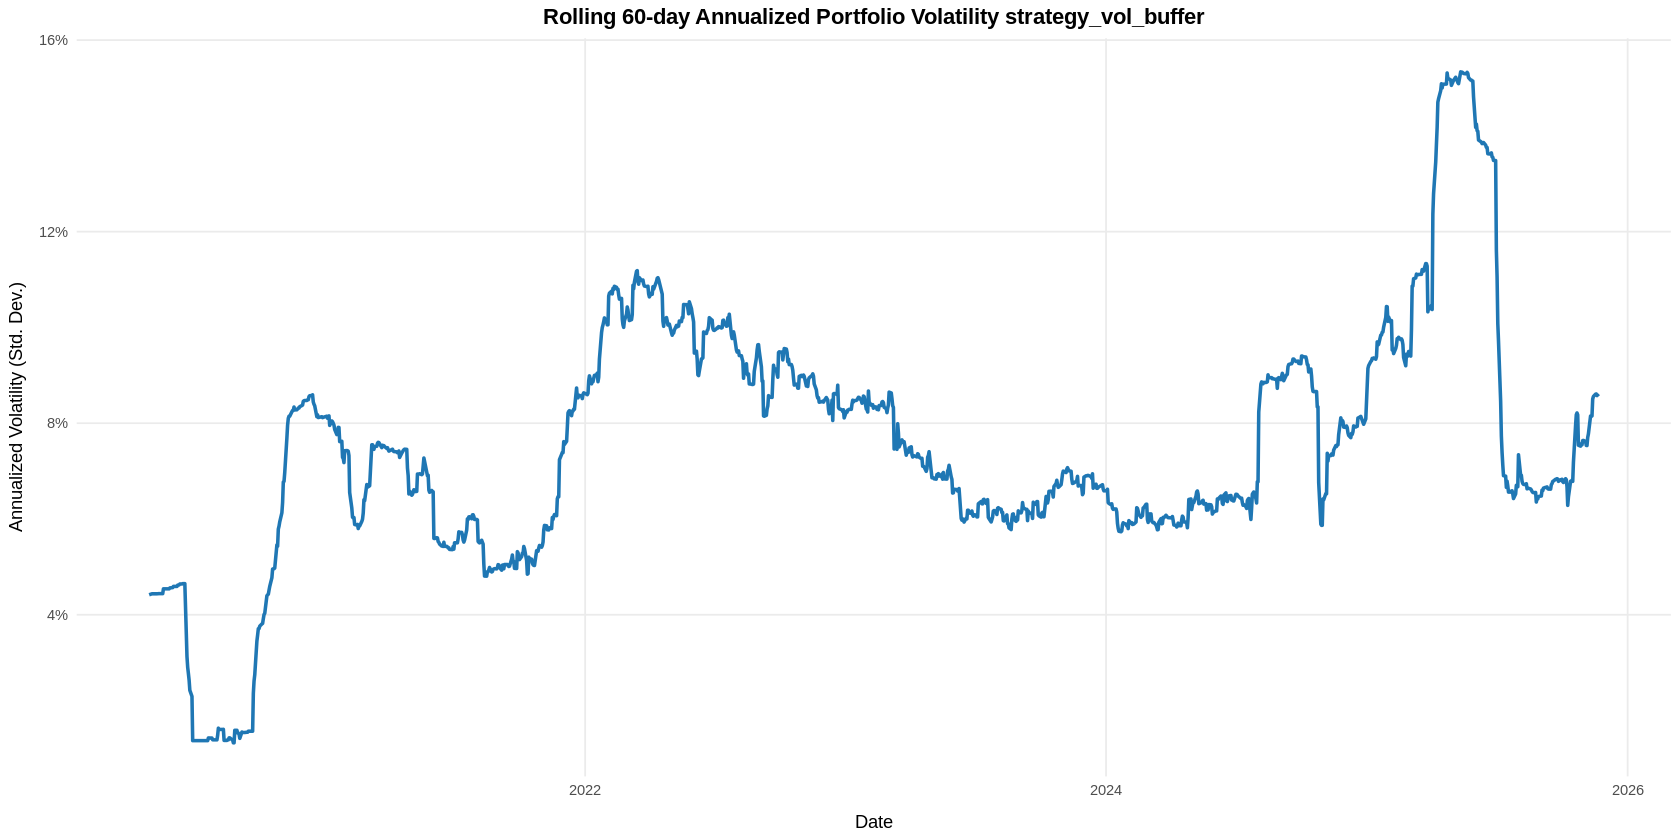

In [145]:
purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_rolling_portfolioVol(
      results_list[[strategy_name]],
      strategy_name
    )
  }
)

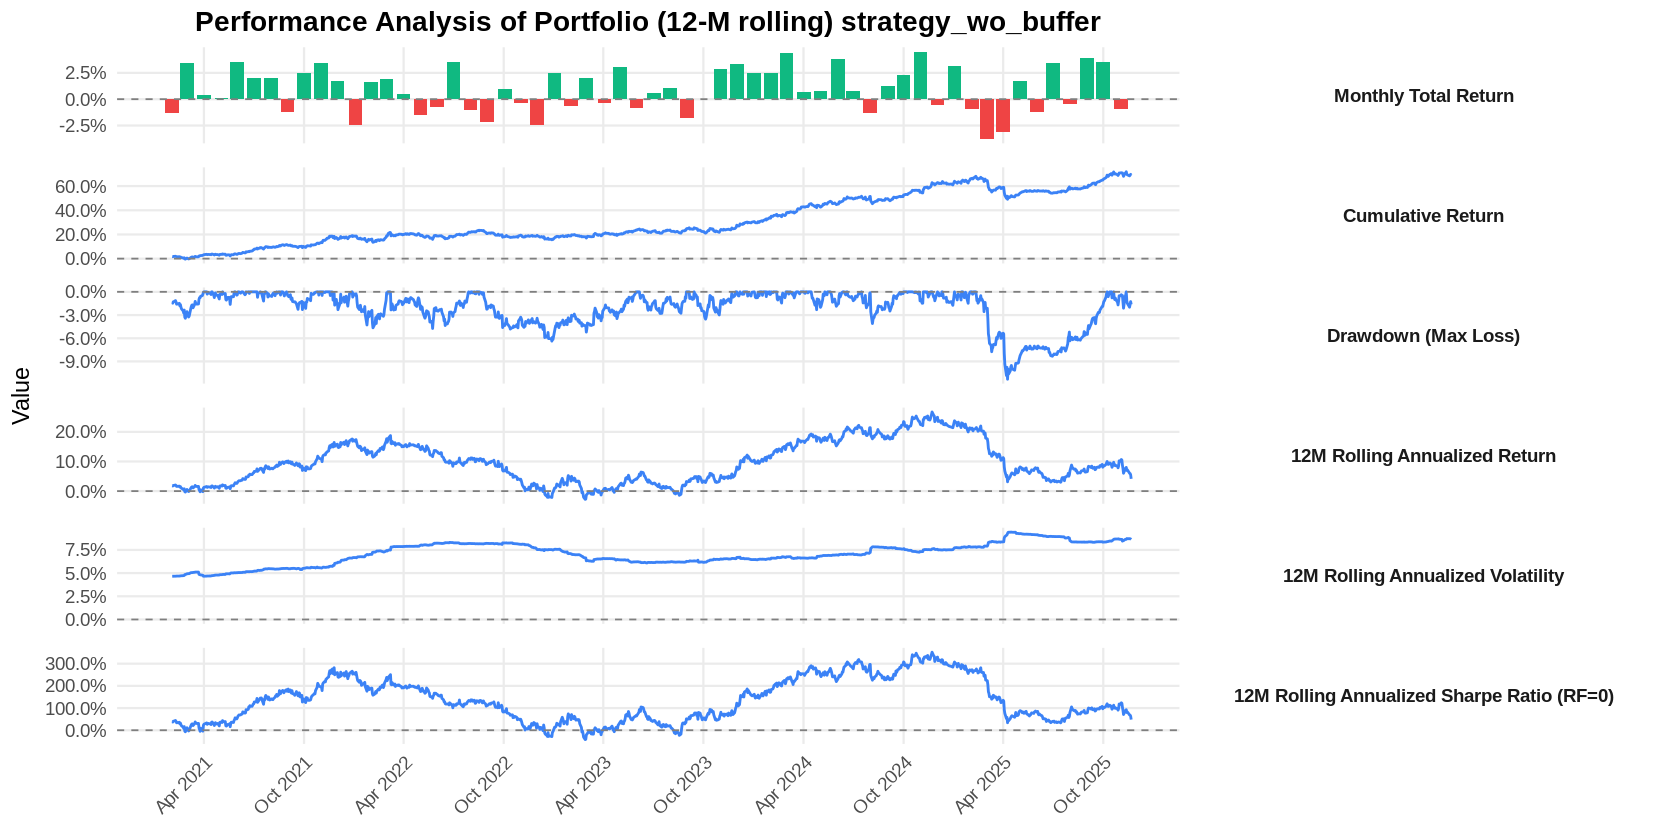

[[1]]

[[2]]

[[3]]


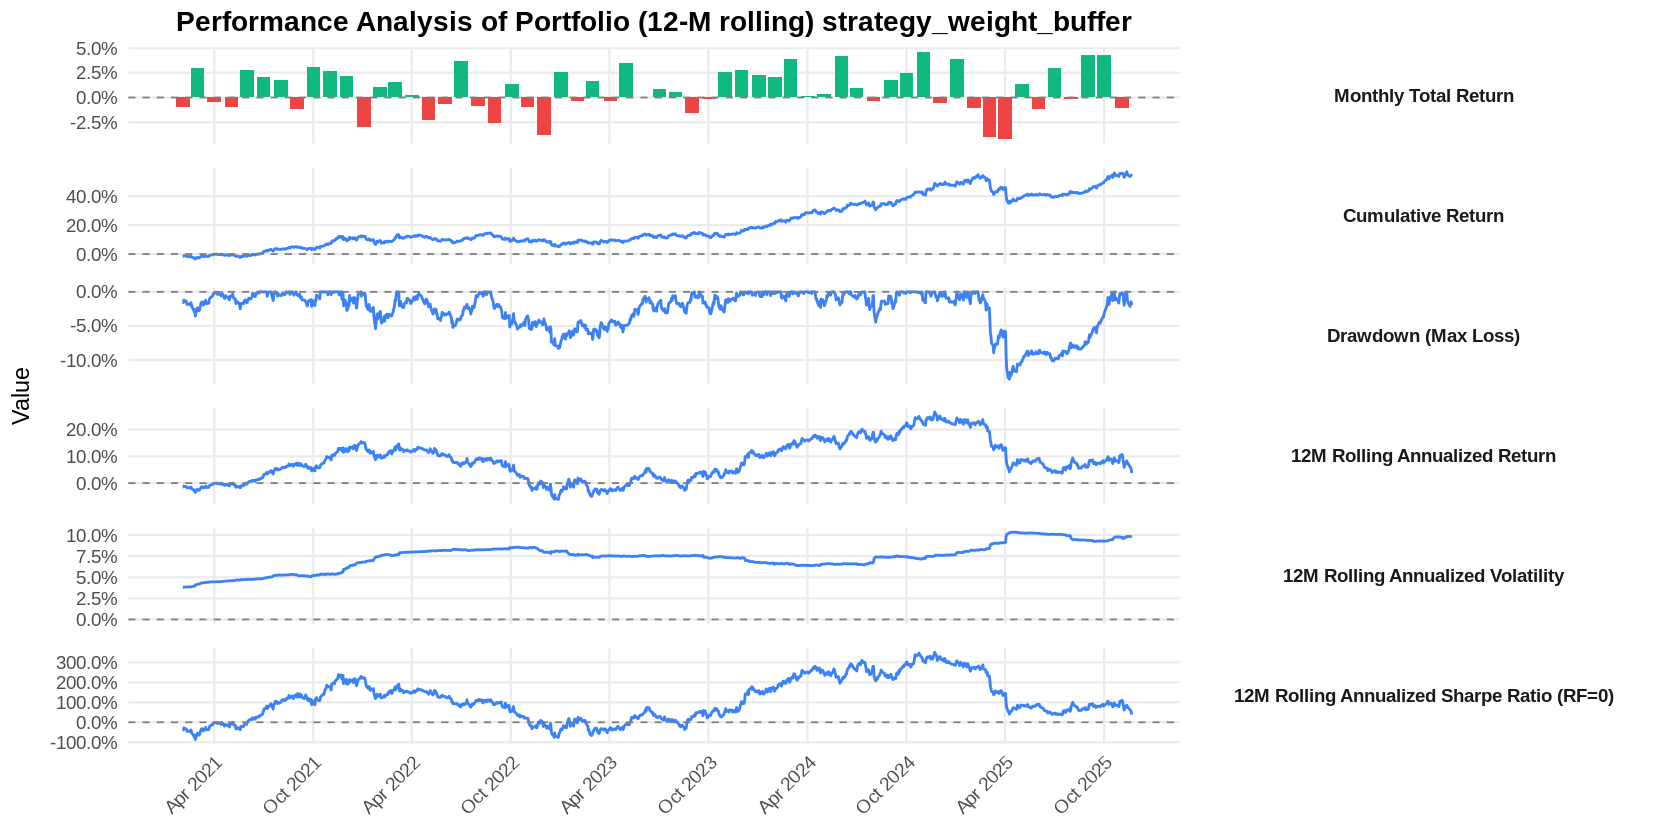

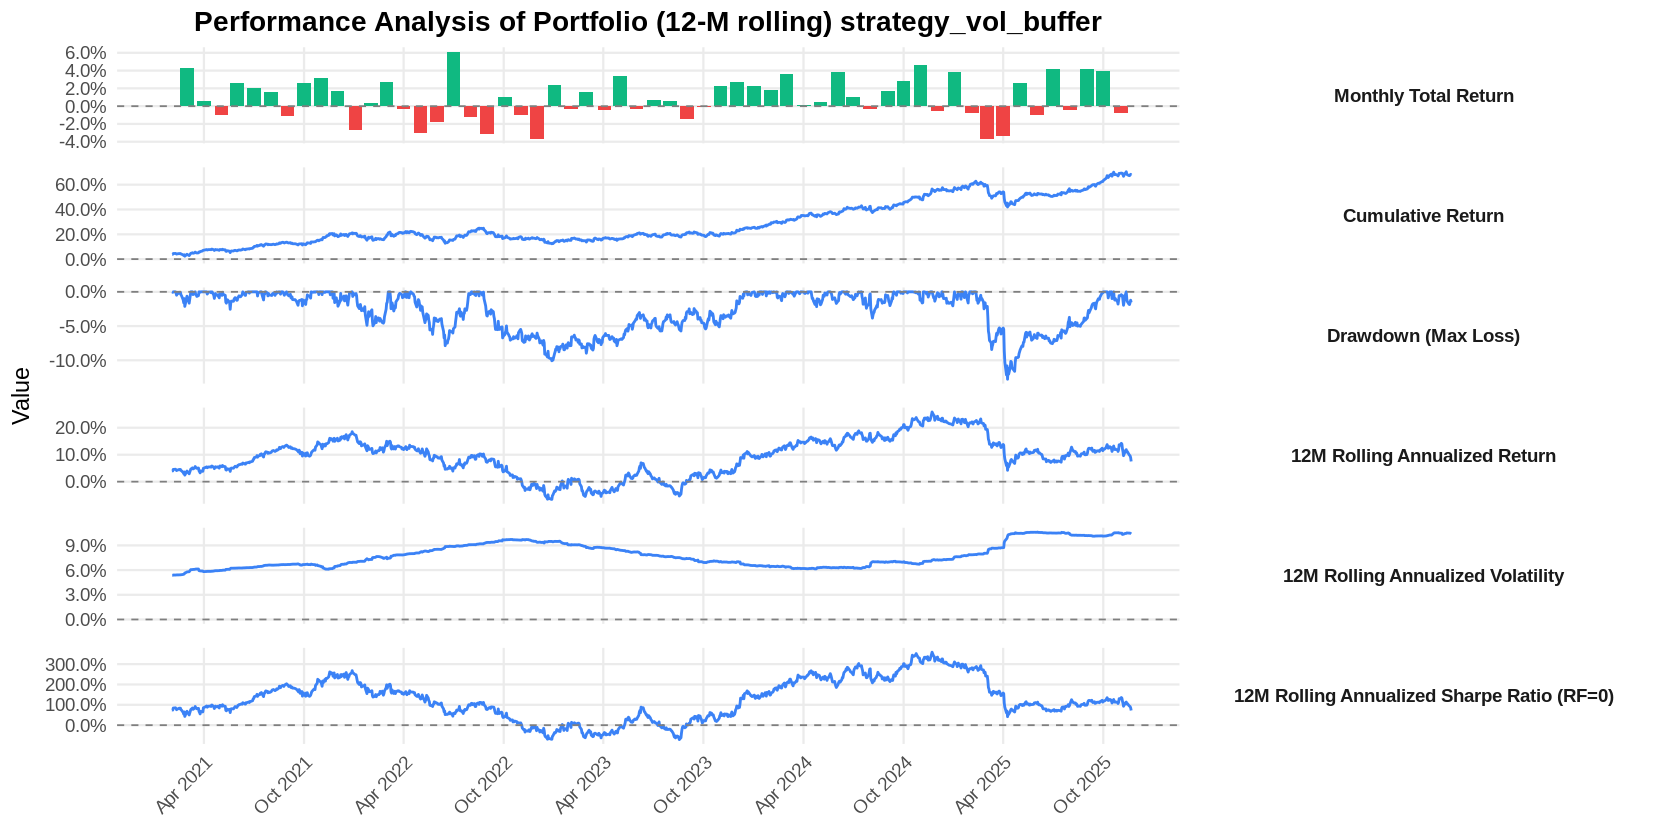

In [74]:
purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_rolling_portfolioPerformance(
      results_list[[strategy_name]],
      strategy_name
    )
  }
)

In [75]:
purrr::map(
  .x = strategy_names,
  .f = function(strategy_name) {
    # 3. Run the analysis function with dynamic inputs
    mq_backtest_annual_performance(
      results_list[[strategy_name]],
      strategy_name
    )
  }
)


## Annual Performance Summary Table



Table: Key Performance Metrics Aggregated by Calendar Year

|Year | Annual Return| Annual Volatility| Max Drawdown| Annual Sharpe Ratio|
|:----|-------------:|-----------------:|------------:|-------------------:|
|2020 |         -0.2%|              4.5%|         3.3%|               -0.04|
|2021 |         19.0%|              6.6%|         3.4%|                2.86|
|2022 |         -2.5%|              7.5%|         6.4%|               -0.33|
|2023 |         12.4%|              6.5%|         5.2%|                1.90|
|2024 |         23.6%|              7.5%|         4.1%|                3.14|
|2025 |          5.1%|              8.8%|        11.3%|                0.57|
## Annual Performance Summary Table



Table: Key Performance Metrics Aggregated by Calendar Year

|Year | Annual Return| Annual Volatility| Max Drawdown| Annual Sharpe Ratio|
|:----|-------------:|-----------------:|------------:|-------------------:|
|2020 |         -3.2%|          

[[1]]
# A tibble: 6 × 5
  Year  `Annual Return` `Annual Volatility` `Max Drawdown` `Annual Sharpe Ratio`
  <chr> <chr>           <chr>               <chr>          <chr>                
1 2020  -0.2%           4.5%                3.3%           "-0.04"              
2 2021  19.0%           6.6%                3.4%           " 2.86"              
3 2022  -2.5%           7.5%                6.4%           "-0.33"              
4 2023  12.4%           6.5%                5.2%           " 1.90"              
5 2024  23.6%           7.5%                4.1%           " 3.14"              
6 2025  5.1%            8.8%                11.3%          " 0.57"              

[[2]]
# A tibble: 6 × 5
  Year  `Annual Return` `Annual Volatility` `Max Drawdown` `Annual Sharpe Ratio`
  <chr> <chr>           <chr>               <chr>          <chr>                
1 2020  -3.2%           3.7%                3.3%           "-0.88"              
2 2021  16.1%           6.8%                3.6%           " 2.39"              
3 2022  -6.4%           8.1%                8.3%           "-0.79"              
4 2023  12.5%           6.8%                7.1%           " 1.83"              
5 2024  24.1%           7.6%                4.5%           " 3.15"              
6 2025  4.8%            10.0%               12.8%          " 0.48"              

[[3]]
# A tibble: 6 × 5
  Year  `Annual Return` `Annual Volatility` `Max Drawdown` `Annual Sharpe Ratio`
  <chr> <chr>           <chr>               <chr>          <chr>                
1 2020  1.3%            5.1%                3.4%           " 0.25"              
2 2021  19.4%           6.9%                2.5%           " 2.80"              
3 2022  -7.0%           9.4%                10.1%          "-0.74"              
4 2023  11.4%           6.6%                9.0%           " 1.72"              
5 2024  23.2%           7.3%                3.8%           " 3.18"              
6 2025  8.7%            10.7%               12.8%          " 0.82"

In [120]:
trade_log <- mq_backtest_tradelog(results_df_buffer_weights)

In [121]:
mq_backtest_tradeSummary(tail(trade_log,2))

## Detailed Trade Summary Log

--- Trade Date: 2025-11-19 ---
Previous Cash: $4901.01
ACTION: SELL 2 shares of PRAS.DE at $17.6390 for a net value of $-35.28 (Previous PRAS.DE Exposure: $41997.08)
   --> New PRAS.DE Exposure: $42121.93 | New Cash Balance: $4936.29

--- Trade Date: 2025-11-20 ---
Previous Cash: $4935.73
ACTION: BUY 3 shares of PRAS.DE at $17.6705 for a net value of $53.01 (Previous PRAS.DE Exposure: $42121.93)
   --> New PRAS.DE Exposure: $42250.17 | New Cash Balance: $4882.72
ACTION: BUY 1 shares of EWG2.SG at $115.5000 for a net value of $115.50 (Previous EWG2.SG Exposure: $13318.15)
   --> New EWG2.SG Exposure: $13398.00 | New Cash Balance: $4767.22


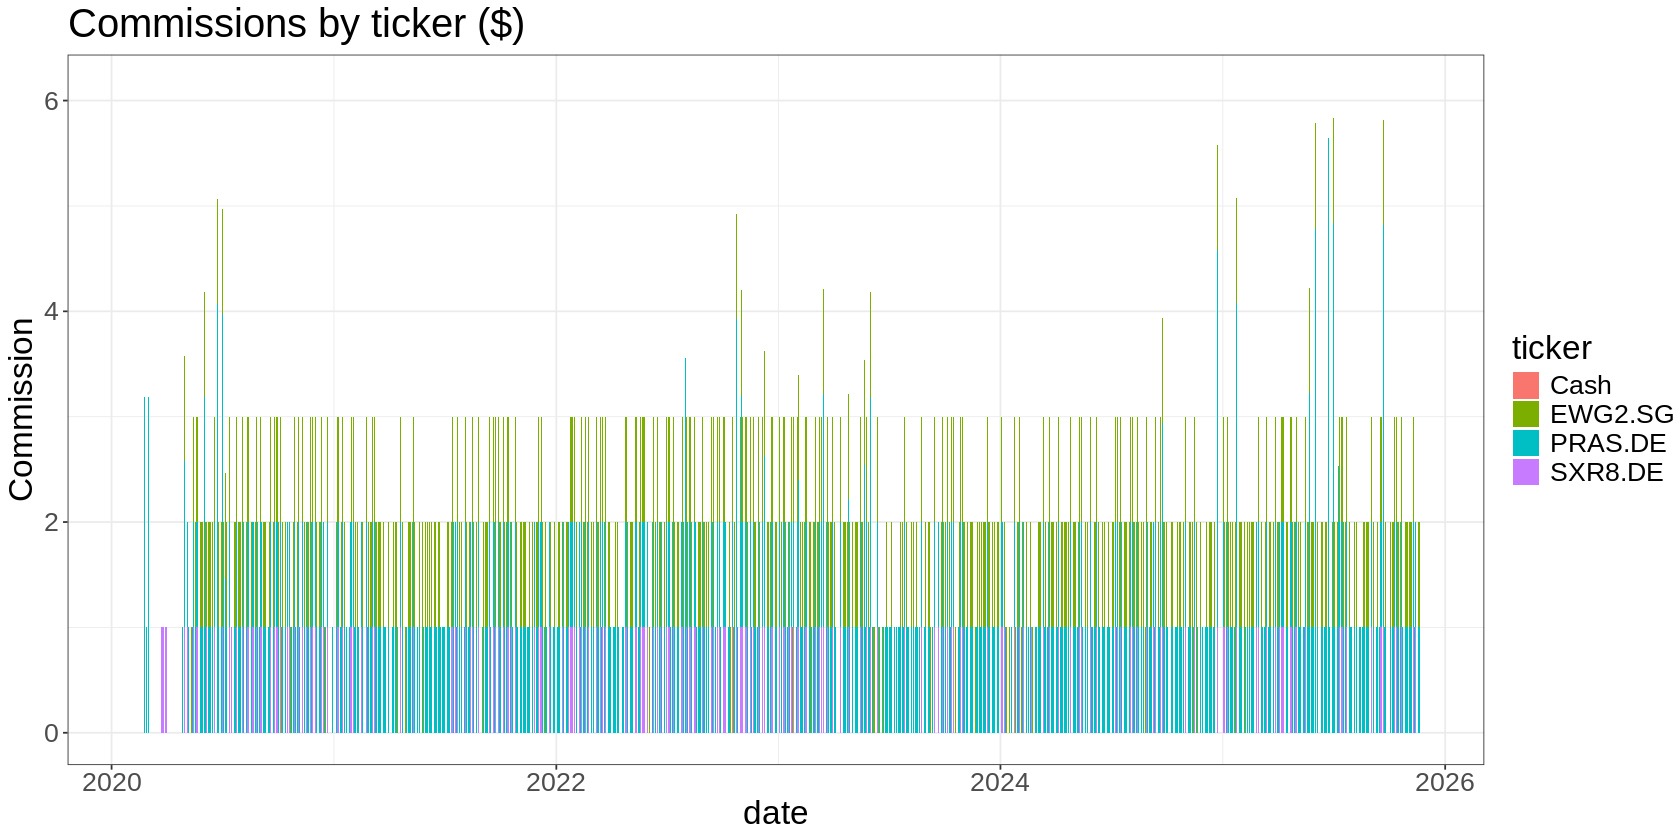

In [123]:
# commissions by ticker over time
results_df_buffer_weights %>%
  ggplot(aes(x = date, y = commission, fill = ticker)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Commissions by ticker ($)",
    x = "date",
    y = "Commission"
  )

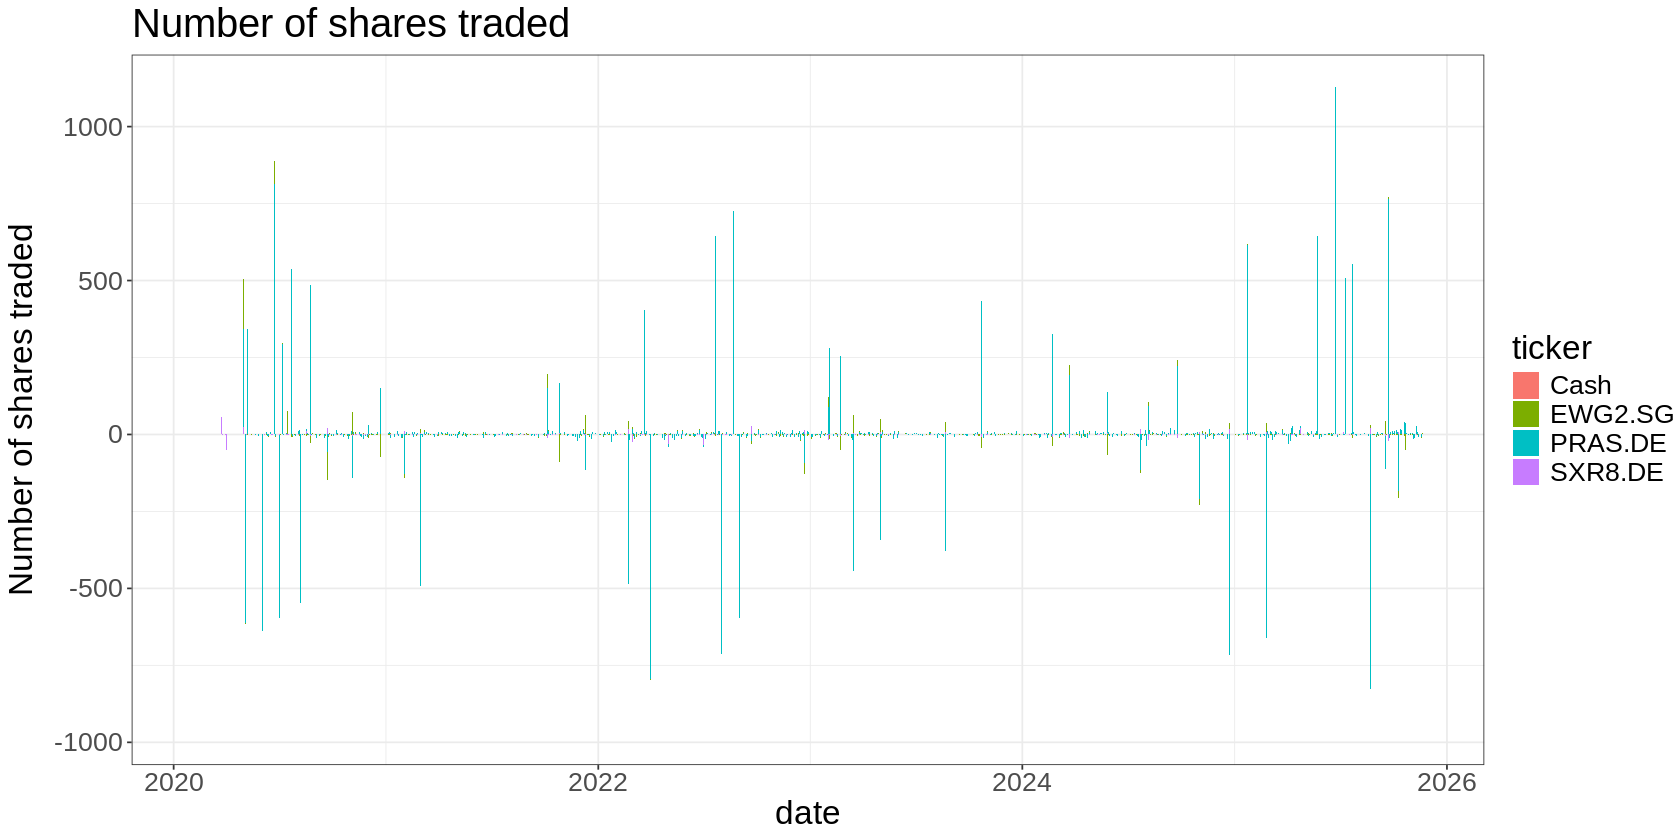

In [124]:
# shares traded over time
results_df_buffer_weights %>%
  ggplot(aes(x = date, y = share_trades, fill = ticker)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Number of shares traded",
    x = "date",
    y = "Number of shares traded"
  )